In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder

from sklearn.manifold import TSNE
from sklearn.manifold import MDS

### RSA For Hippocampal connections in the brain


In [2]:
df_female = pd.read_excel('../data/br2f_topographic_data.xlsx', header=0, index_col=0)

# define left hemisphere
brain_regions = df_female.index.to_numpy()
left_hemisphere = brain_regions[:392]
df_left_hemisphere = df_female[left_hemisphere]
df_left_hemisphere = df_left_hemisphere.head(392)

df_female_lh = df_female.iloc[:392,:392]
df_female_rh = df_female.iloc[392:,392:]
df_female_rh.columns = df_female_rh.columns.str.replace(r'\.1$', '', regex=True)

# Define the hippocampus regions. Leaving the original for reference later on. We choose these seven regions.
# hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd','PAR', 'PRE', 'POST'])
hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd'])

In [3]:
BST_test_regions = np.array(['BSTam', 'BSTv', 'BSTmg', 'BSTal', 'BSTov'])

In [4]:
df_male = pd.read_excel('../data/br2m_topographic_data.xlsx', header=0, index_col=0)

# define left and right hemisphere
df_male_lh = df_male.iloc[:392,:392]
df_male_rh = df_male.iloc[392:,392:]
df_male_rh.columns = df_male_rh.columns.str.replace(r'\.1$', '', regex=True)

In [5]:
df_male_lh

GPm  GPl  SI  MA  MS  NDB  TRS  BSTam  BSTfu  BSTv  ...  NTSco  AP  GR  \
Abbr.                                                      ...                  
GPm      0    2   0   0   0    0    0      0      0     0  ...      0   0   0   
GPl      6    0   2   0   0    0    0      0      0     0  ...      0   0   0   
SI       0    2   0   3   0    2    0      3      0     3  ...      0   0   0   
MA       0    0   1   0   2    3    0      0      0     0  ...      0   0   0   
MS       0    0   2   2   0    5    2      2      0     0  ...      0   0   0   
...    ...  ...  ..  ..  ..  ...  ...    ...    ...   ...  ...    ...  ..  ..   
ACU      0    0   0   0   0    0    0      0      0     0  ...      0   0   0   
PAT      0    0   0   0   0    0    0      0      0     0  ...      1   0   1   
SPVO     0    0   0   0   0    0    0      0      0     0  ...      1   0   0   
SPVI     0    0   0   0   0    0    0      0      0     0  ...      1   0   1   
SPVC     0    0   0   0   0    0    0      0      0     0  ...      2   0   0   

       Z  CU  ACU  PAT  SPVO  SPVI  SPVC  
Abbr.                                     
GPm    0   0    0    0     0     0     0  
GPl    0   0    0    0     0     0     0  
SI     0   0    0    0     0     0     0  
MA     0   0    0    0     0     0     0  
MS     0   0    0    0     0     0     0  
...   ..  ..  ...  ...   ...   ...   ...  
ACU    0   0    0    0     0     0     0  
PAT    0   0    0    0     3     3     0  
SPVO   0   3    0    0     0     0     0  
SPVI   0   1    0    0     6     0     6  
SPVC   0   2    0    5     6     6     0  

[392 rows x 392 columns]

In [6]:
df_sum = df_male_rh + df_male_lh + df_female_rh + df_female_lh

In [7]:
df_average = df_sum / 4

In [8]:
df_average.to_csv('../output/average_connectome_data.csv')

In [9]:
# define hippocampal subregions - updated on Mar. 5
hippocampal_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd'])

In [10]:
# FROM hippocampus

df_avg_from = df_average[df_average.index.isin(hippocampal_regions)]

# TO hippocampus
df_average_t = df_average.T
df_avg_to = df_average_t[df_average_t.index.isin(hippocampal_regions)]

In [11]:
# drop HPC columns

df_avg_from = df_avg_from.drop(hippocampus_regions, axis=1)
df_avg_to = df_avg_to.drop(hippocampus_regions, axis=1)

# filter to only include columns and rows with at least one connection
df_avg_from = df_avg_from.loc[:,df_avg_from.apply(np.count_nonzero, axis=0) >= 1]
df_avg_to = df_avg_to.loc[:,df_avg_to.apply(np.count_nonzero, axis=0) >= 1]

In [12]:
df_avg_from

SI   MS  NDB  TRS  BSTam  BSTfu  BSTv  BSTmg  BSTdm  BSTal  ...   AV  \
Abbr.                                                               ...        
DG     0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
CA3    1.0  2.0  2.0  2.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
CA2    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
CA1v   2.0  3.0  3.0  0.0    1.0    1.0   2.0    0.0    0.0    1.0  ...  0.0   
CA1d   0.0  0.0  1.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
SUBv   2.0  0.0  0.0  0.0    4.0    1.0   2.0    2.0    2.0    2.0  ...  0.0   
SUBd   0.0  2.0  2.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  3.0   

       AMd  IAM  SMT   LH  VTA  PRC  COM  PAGrn  DTN  
Abbr.                                                 
DG     0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
CA3    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
CA2    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
CA1v   1.0  1.0  0.0  0.0  1.0  0.0  0.0    1.0  0.0  
CA1d   0.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0  0.0  
SUBv   0.0  1.0  0.0  2.0  2.0  1.0  1.0    1.0  1.0  
SUBd   0.0  4.0  2.0  0.0  1.0  0.0  0.0    0.0  1.0  

[7 rows x 165 columns]

#### Compute correlation between spearman vs cosine distance metrics

In [13]:
# probably want to drop na columns and rows of all NaNs
spearman_df_from = (df_avg_from.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')
spearman_df_to = (df_avg_to.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')

In [14]:
# probably want to drop na columns and rows of all NaNs
pearson_df_from = (df_avg_from.corr().dropna(axis=0, how='all')).dropna(axis=1, how='all')
pearson_df_to = (df_avg_to.corr().dropna(axis=0, how='all')).dropna(axis=1, how='all')

spearman_df_from = (df_avg_from.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')
spearman_df_to = (df_avg_to.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')


cosine_distance_from = cosine_similarity(df_avg_from.T)
cosine_distance_df_from = pd.DataFrame(cosine_distance_from, index=df_avg_from.columns, columns=df_avg_from.columns)

cosine_distance_to = cosine_similarity(df_avg_to.T)
cosine_distance_df_to = pd.DataFrame(cosine_distance_to, index=df_avg_to.columns, columns=df_avg_to.columns)

In [15]:
# pearson-spearman comparison

# from (efferent)
common_indices_from = pearson_df_from.index.intersection(spearman_df_from.index)

rsa_pearson_aligned_from = pearson_df_from.loc[common_indices_from, common_indices_from]
rsa_spearman_aligned_from = spearman_df_from.loc[common_indices_from, common_indices_from]

# to (afferent)
common_indices_to = pearson_df_to.index.intersection(spearman_df_to.index)

rsa_pearson_aligned_to = pearson_df_to.loc[common_indices_to, common_indices_to]
rsa_spearman_aligned_to = spearman_df_to.loc[common_indices_to, common_indices_to]

In [16]:
# spearman-cosine comparison
# from (efferent)
common_indices_from = spearman_df_from.index.intersection(cosine_distance_df_from.index)

rsa_spearman_aligned_from = spearman_df_from.loc[common_indices_from, common_indices_from]
rsa_cosine_aligned_from = cosine_distance_df_from.loc[common_indices_from, common_indices_from]

# to (afferent)
common_indices_to = spearman_df_to.index.intersection(cosine_distance_df_to.index)

rsa_spearman_aligned_to = spearman_df_to.loc[common_indices_to, common_indices_to]
rsa_cosine_aligned_to = cosine_distance_df_to.loc[common_indices_to, common_indices_to]

#### Spearman correlation

In [17]:
from scipy.stats import spearmanr, pearsonr

# next take the correlation between the matrices
# efferent
flat_spearman_efferent = rsa_spearman_aligned_from.values.flatten()
flat_cosine_efferent = rsa_pearson_aligned_from.values.flatten()

correlation_efferent, p_value = pearsonr(flat_spearman_efferent, flat_spearman_efferent)

# afferent
flat_spearman_afferent = rsa_spearman_aligned_to.values.flatten()
flat_cosine_afferent = rsa_cosine_aligned_to.values.flatten()

correlation_afferent, p_value = pearsonr(flat_spearman_afferent, flat_cosine_afferent)

In [18]:
print(correlation_efferent, correlation_afferent)

1.0 0.8192763968096615


In [19]:
top_right_spear = rsa_spearman_aligned_to.iloc[:10, -10:]
top_right_cosine = rsa_cosine_aligned_to.iloc[:10, -10:]

In [20]:
rsa_cosine_aligned_to

Abbr.        SI        MS       NDB     BSTam     BSTju     BSTrh     BSTpr  \
Abbr.                                                                         
SI     1.000000  0.613572  0.283473  0.707107  0.707107  0.707107  0.707107   
MS     0.613572  1.000000  0.855162  0.542326  0.325396  0.325396  0.542326   
NDB    0.283473  0.855162  1.000000  0.267261  0.133631  0.133631  0.267261   
BSTam  0.707107  0.542326  0.267261  1.000000  0.000000  0.000000  1.000000   
BSTju  0.707107  0.325396  0.133631  0.000000  1.000000  1.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
VTA    0.587427  0.939689  0.872247  0.356034  0.474713  0.474713  0.356034   
RR     0.848528  0.846029  0.721605  0.600000  0.600000  0.600000  0.600000   
PAGvm  0.000000  0.436564  0.657376  0.000000  0.000000  0.000000  0.000000   
NI     0.685994  0.920734  0.713024  0.485071  0.485071  0.485071  0.485071   
LC     0.303046  0.852227  0.839964  0.142857  0.285714  0.285714  0.142857   

Abbr.     BSTif     BSTtr      BSTd  ...       CLI        CS        DR  \
Abbr.                                ...                                 
SI     0.707107  0.707107  0.707107  ...  0.707107  0.000000  0.344124   
MS     0.542326  0.325396  0.325396  ...  0.542326  0.626224  0.721411   
NDB    0.267261  0.133631  0.133631  ...  0.267261  0.771517  0.693688   
BSTam  1.000000  0.000000  0.000000  ...  1.000000  0.000000  0.162221   
BSTju  0.000000  1.000000  1.000000  ...  0.000000  0.000000  0.324443   
...         ...       ...       ...  ...       ...       ...       ...   
VTA    0.356034  0.474713  0.474713  ...  0.356034  0.753708  0.770086   
RR     0.600000  0.600000  0.600000  ...  0.600000  0.461880  0.616441   
PAGvm  0.000000  0.000000  0.000000  ...  0.000000  0.774597  0.580381   
NI     0.485071  0.485071  0.485071  ...  0.485071  0.560112  0.550823   
LC     0.142857  0.285714  0.285714  ...  0.142857  0.824786  0.926980   

Abbr.       SNc       SNr       VTA        RR     PAGvm        NI        LC  
Abbr.                                                                        
SI     0.700000  0.500000  0.587427  0.848528  0.000000  0.685994  0.303046  
MS     0.690268  0.536875  0.939689  0.846029  0.436564  0.920734  0.852227  
NDB    0.642540  0.566947  0.872247  0.721605  0.657376  0.713024  0.839964  
BSTam  0.424264  0.707107  0.356034  0.600000  0.000000  0.485071  0.142857  
BSTju  0.565685  0.000000  0.474713  0.600000  0.000000  0.485071  0.285714  
...         ...       ...       ...       ...       ...       ...       ...  
VTA    0.839181  0.503509  1.000000  0.878218  0.530745  0.921078  0.898563  
RR     0.876812  0.707107  0.878218  1.000000  0.447214  0.824621  0.657143  
PAGvm  0.379473  0.632456  0.530745  0.447214  1.000000  0.216930  0.638877  
NI     0.754594  0.342997  0.921078  0.824621  0.216930  1.000000  0.727607  
LC     0.646498  0.404061  0.898563  0.657143  0.638877  0.727607  1.000000  

[96 rows x 96 columns]

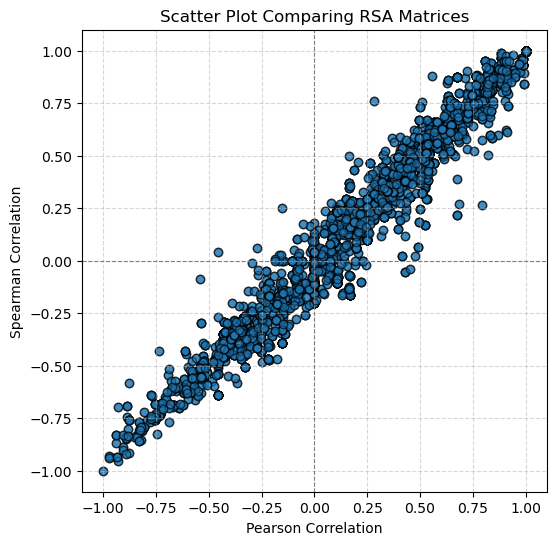

In [21]:
# Flatten matrices to get corresponding values
x_values = rsa_spearman_aligned_to.to_numpy().flatten()  # Spearman correlations
y_values = rsa_pearson_aligned_to.to_numpy().flatten()  # Pearson correlations

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, alpha=0.6, edgecolor="k")
plt.xlabel("Pearson Correlation")
plt.ylabel("Spearman Correlation")
plt.title("Scatter Plot Comparing RSA Matrices")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.8)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

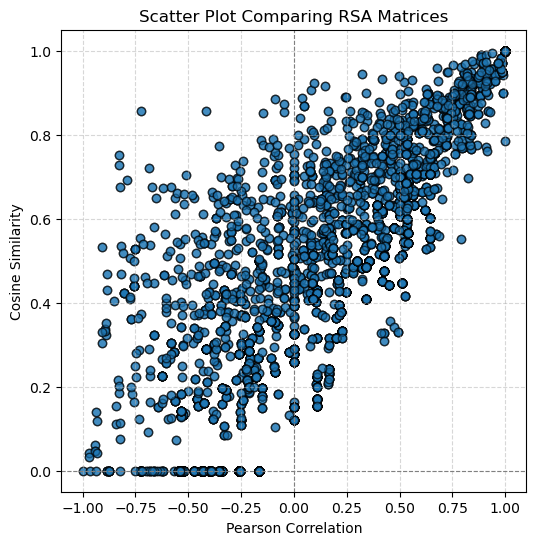

In [22]:
# Flatten matrices to get corresponding values
x_values = rsa_spearman_aligned_to.to_numpy().flatten()  # Spearman correlations
y_values = rsa_cosine_aligned_to.to_numpy().flatten()  # Pearson correlations

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, alpha=0.6, edgecolor="k")
plt.xlabel("Pearson Correlation")
plt.ylabel("Cosine Similarity")
plt.title("Scatter Plot Comparing RSA Matrices")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.8)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Matrix distance (frobenius norm)

In [23]:
frob_norm_efferent = np.linalg.norm(rsa_spearman_aligned_from - rsa_cosine_aligned_from, ord='fro')

frob_norm_afferent = np.linalg.norm(rsa_spearman_aligned_to - rsa_cosine_aligned_to, ord='fro')

In [24]:
print(frob_norm_efferent, frob_norm_afferent)

28.60449526722467 37.96493677295348


In [27]:
df_female_lh[df_female_lh.index.isin(hippocampus_regions)]

GPm  GPl  SI  MA  MS  NDB  TRS  BSTam  BSTfu  BSTv  ...  NTSco  AP  GR  \
Abbr.                                                      ...                  
DG       0    0   0   0   0    0    0      0      0     0  ...      0   0   0   
CA3      0    0   1   0   2    2    2      0      0     0  ...      0   0   0   
CA2      0    0   0   0   0    0    0      0      0     0  ...      0   0   0   
CA1v     0    0   2   0   3    3    0      1      1     2  ...      0   0   0   
CA1d     0    0   0   0   0    1    0      0      0     0  ...      0   0   0   
SUBv     0    0   2   0   0    0    0      4      1     2  ...      0   0   0   
SUBd     0    0   0   0   2    2    0      0      0     0  ...      0   0   0   

       Z  CU  ACU  PAT  SPVO  SPVI  SPVC  
Abbr.                                     
DG     0   0    0    0     0     0     0  
CA3    0   0    0    0     0     0     0  
CA2    0   0    0    0     0     0     0  
CA1v   0   0    0    0     0     0     0  
CA1d   0   0    0    0     0     0     0  
SUBv   0   0    0    0     0     0     0  
SUBd   0   0    0    0     0     0     0  

[7 rows x 392 columns]

### Spearman from

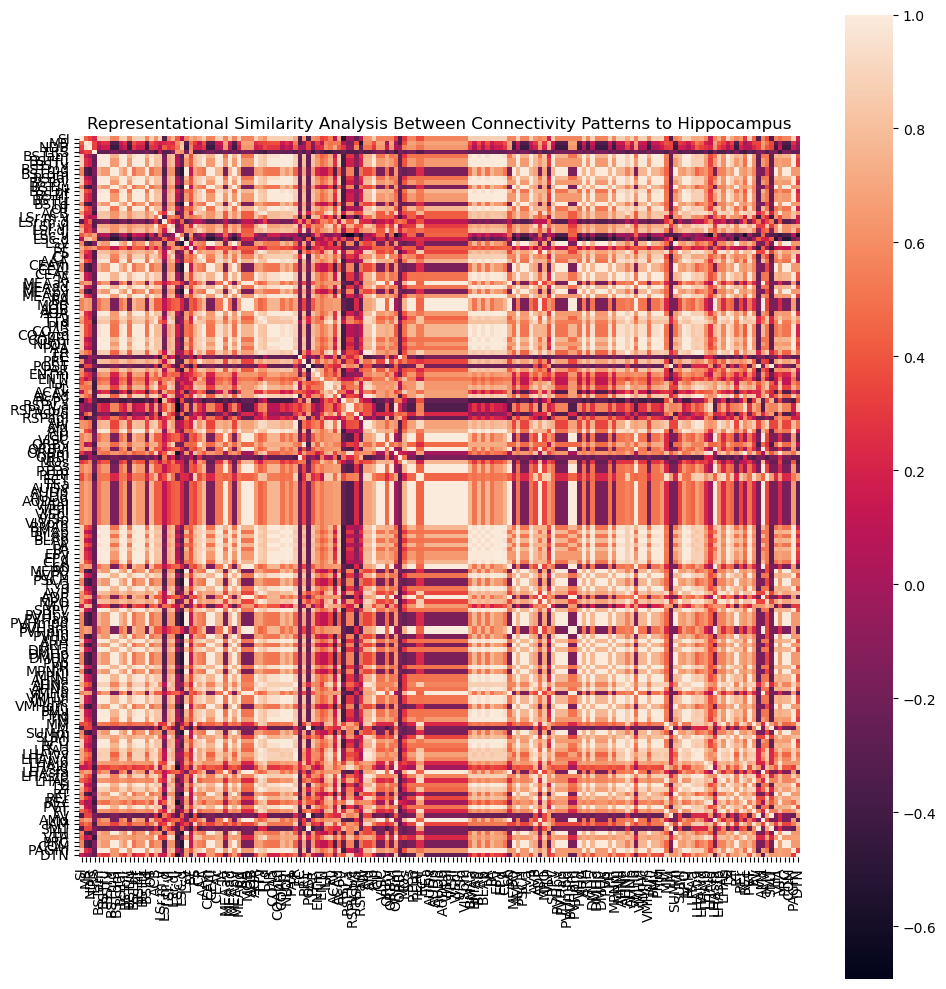

In [28]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(spearman_df_from, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Show the plot
plt.show()

### Spearman to

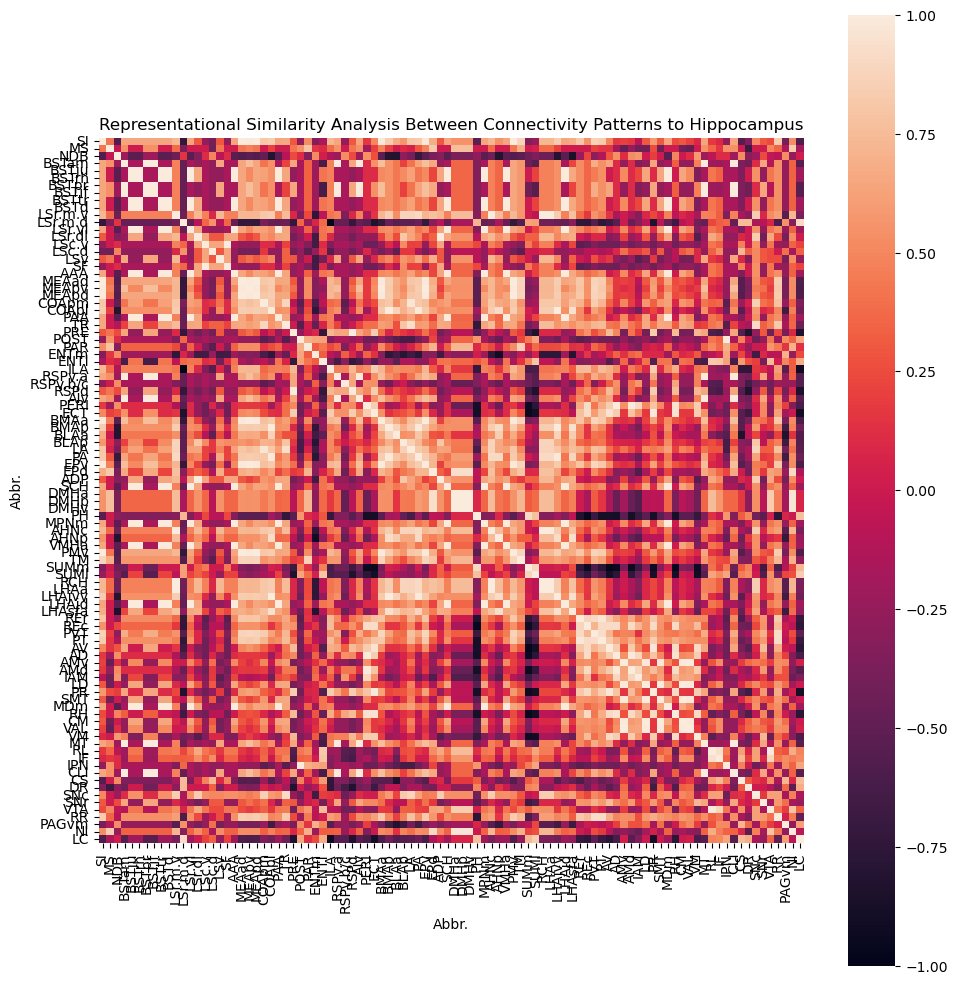

In [29]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(spearman_df_to, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Show the plot
plt.show()

### Cosine similarity from

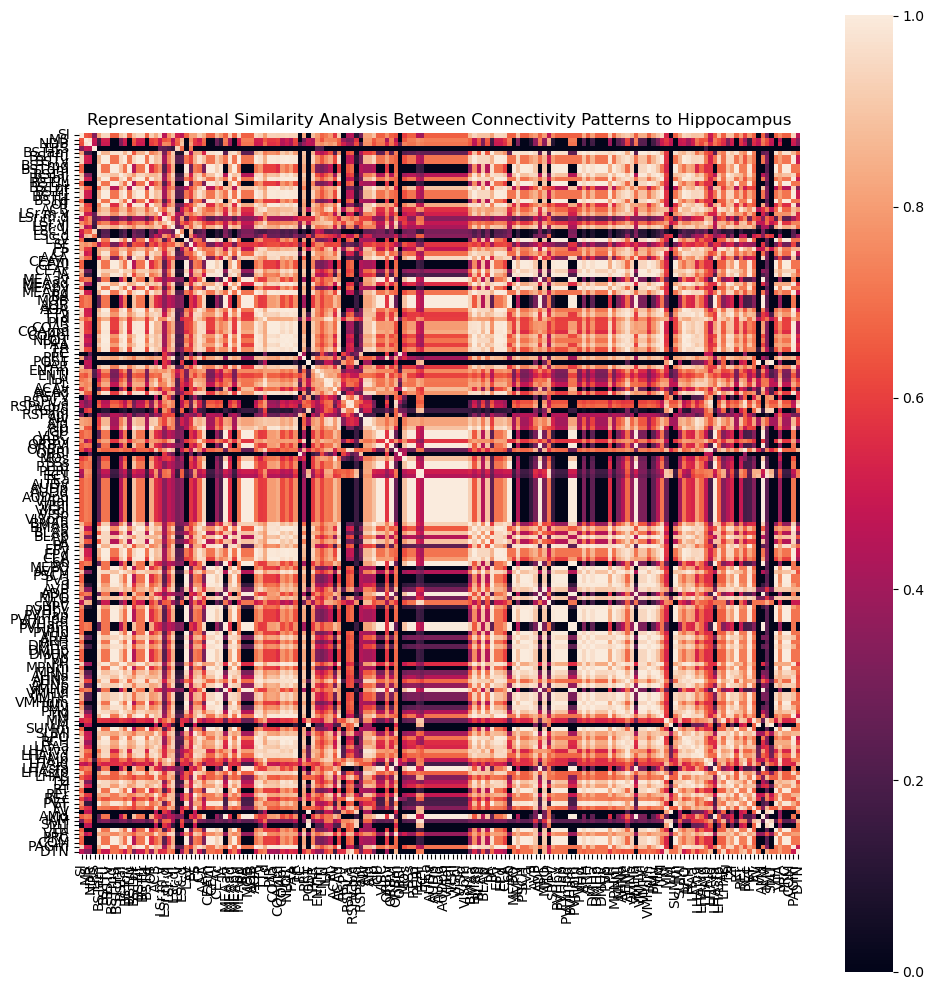

In [30]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(cosine_distance_df_from, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Show the plot
plt.show()

### Cosine similarity to

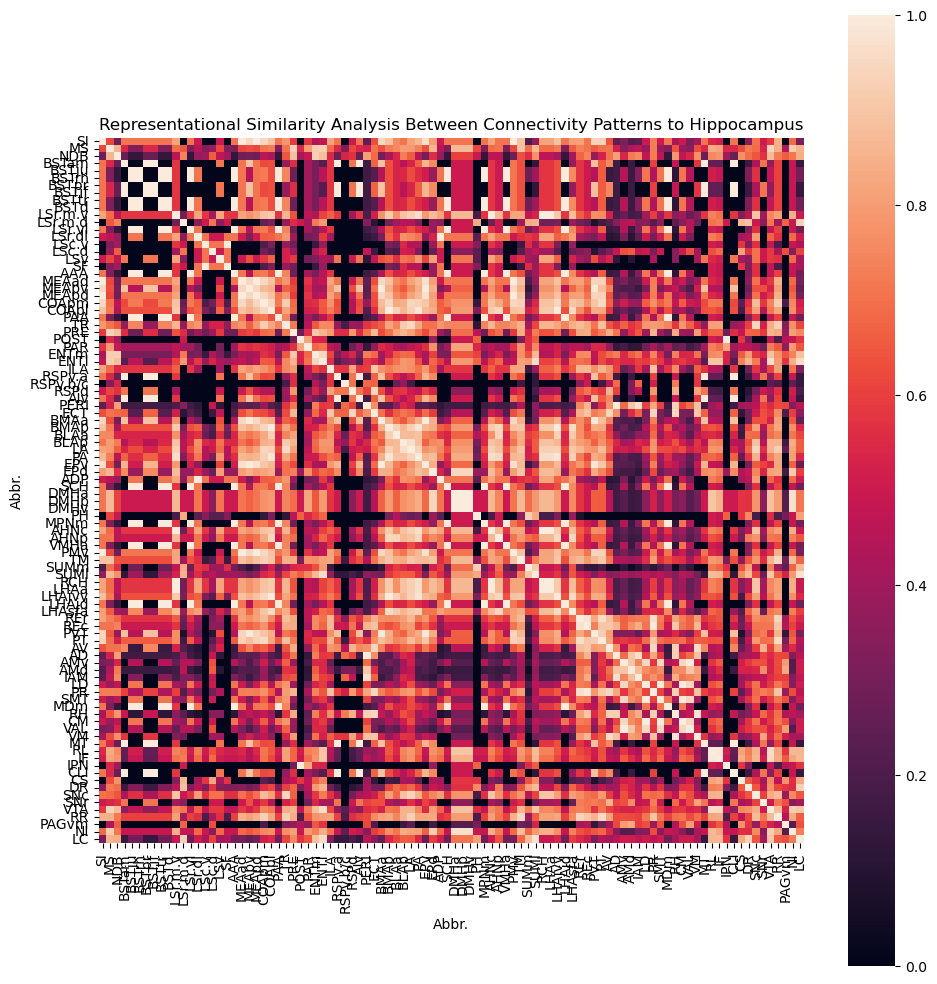

In [31]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(cosine_distance_df_to, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Show the plot
plt.show()

# Multidimensional scaling

In [32]:
# define brain regions and which subregions they contain
# Define brain regions and their groups

# construct cortical
OLF_regions = np.array(['MOB','AOB','AOA','TTv','TTd','PIR','NLOT','TR'])
PARAH_regions = np.array(['IG','FC','ENTm','ENTl','PERI','ECT','CLA','6b'])
PFC_regions = np.array(['ILA','PL','ACAv','ACAd'])
ISU_regions = np.array(['AIv','AId','AIp'])
ORB_regions = np.array(['ORBv','ORBvl','ORBm','ORBl'])
PSM_regions = np.array(['MOp','MOs'])
SSR_regions = np.array(['SSp','SSs'])
AUD_regions = np.array(['AUDv','AUDp','AUDd','AUDpo'])
VIS_regions = np.array(['VISrl','VISal','VISlla','VISll','VISli','VISlm','VISpl','VISp','VISam','VISpm'])
EP_regions = np.array(['EPv','EPd'])
RSP_regions = np.array(['RSPv','RSPv.a','RSPv.b/c','RSPd','RSPagl'])
GVA_regions = np.array(['GU','VISC'])


cortical_regions = np.concatenate(
    (OLF_regions, PARAH_regions, PFC_regions, ISU_regions, ORB_regions, PSM_regions, SSR_regions, AUD_regions, VIS_regions, 
    EP_regions, RSP_regions, GVA_regions), axis=0
)

# hypothalamic regions
AHA_regions = np.array(['AHA', 'AHNa', 'AHNc', 'AHNp', 'AHNd'])
DHA_regions = np.array(['DMHa','DMHp','DMHv'])
mammillary_regions = np.array(['TM','MM','LM','SUMm','SUMl'])
LHA_regions = np.array([
    'LHAa','LHAjvv','LHAjvd','LHAjp','LHAjd','LHAsfa','LHAsfp','LHAs','LHAv','LHAd','LHAp'
])

hypothalamus_regions = np.concatenate(
    (AHA_regions, DHA_regions, mammillary_regions, LHA_regions), axis=0
)

# amygdala regions
CEA_regions = np.array(['CEAm','CEAl','CEAc'])
MEA_regions = np.array(['MEAav','MEAad','MEApv','MEApd'])
BST_regions = np.array([
    'BSTam','BSTfu','BSTv','BSTmg','BSTdm','BSTal','BSTov','BSTju','BSTrh','BSTpr','BSTif','BSTtr','BSTd','BSTse'
])

amygdala_non_aggregated_regions = np.array(['AAA','IA'])

amygdala_aggregated_regions = np.concatenate(
    (CEA_regions, MEA_regions, BST_regions), axis=0
)

# septal striatal regions
LS_aggregated_regions = np.array(['LSr.m.v','LSr.m.d','LSr.vl','LSr.dl','LSc.v','LSc.d','LSv'])

LS_non_aggregated_regions = np.array(['MS','NDB','ACB'])

hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd','PAR', 'PRE', 'POST'])

septostri_regions = np.concatenate(
    (LS_aggregated_regions, LS_non_aggregated_regions), axis=0
)

In [33]:
# create region groupings for spearman
dissimilarity_matrix = 1 - spearman_df_from

regions = list(dissimilarity_matrix.index)

# Assign each region to a group
region_groups = {}
for region in regions:
    if region in cortical_regions:
        region_groups[region] = "Cortical"
    elif region in hypothalamus_regions:
        region_groups[region] = "Hypothalamus"
    elif region in amygdala_aggregated_regions:
        region_groups[region] = "Amygdala"
    elif region in septostri_regions:
        region_groups[region] = "Septal Striatum"
    else:
        region_groups[region] = "Other"

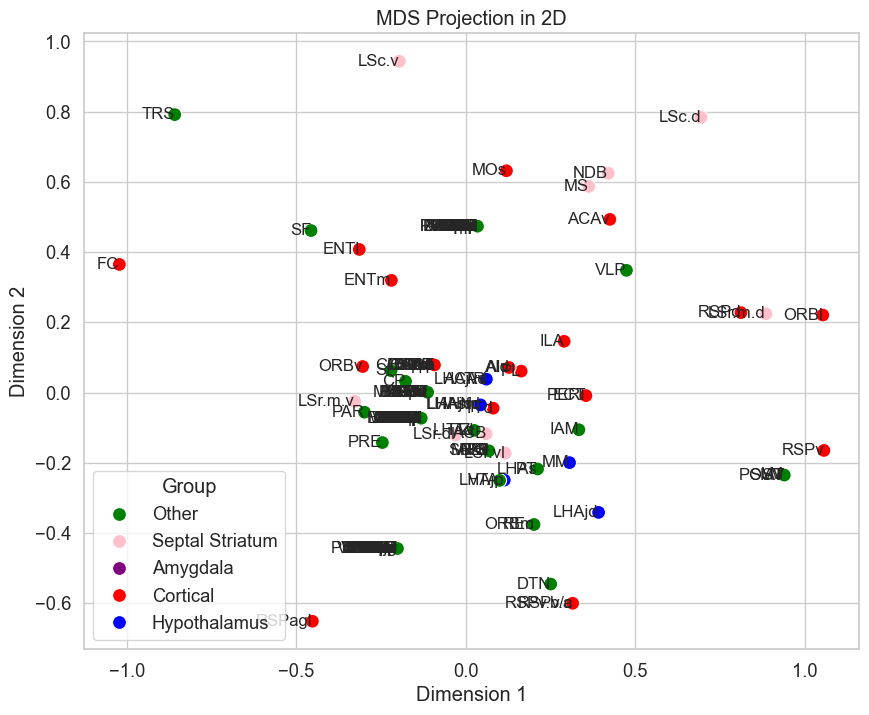

In [34]:
# do multidimensional scaling in 2D

dissimilarity_matrix = 1 - spearman_df_from

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)


# Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', 
    data=mds_results, 
    hue='Group',  # Group coloring
    palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
    s=100, 
    marker='o'
)

# Annotate each point with its label
for label, (x, y, z) in mds_results.iterrows():
    plt.text(x, y, label, fontsize=12, ha='right', va='center')

# Add labels and title
plt.title("MDS Projection in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


plt.savefig("../output/MDS_2D_spearman_from.svg", format="svg")
# Show the plot
plt.show()

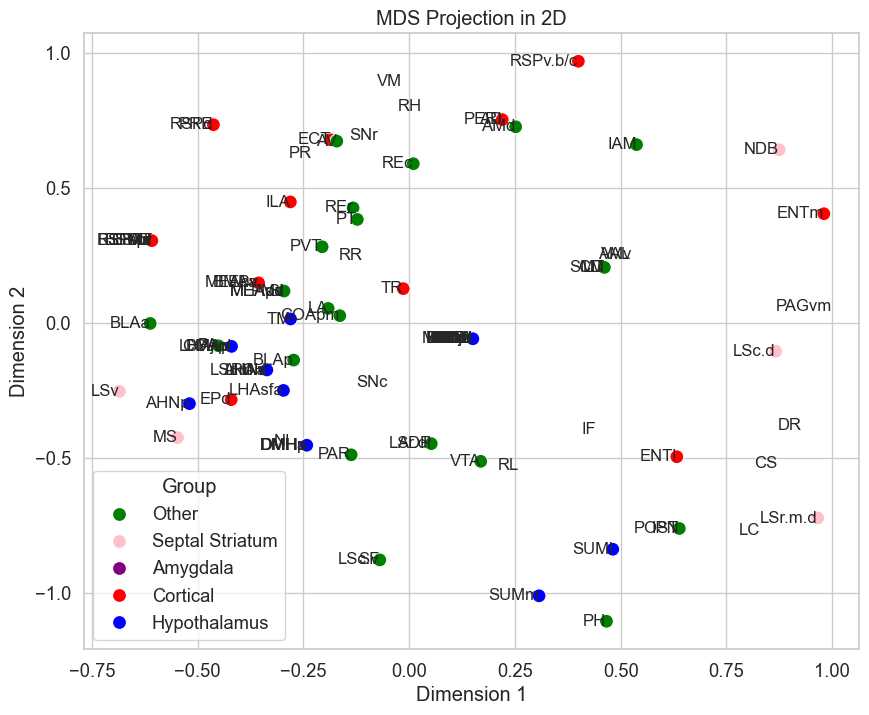

In [35]:
# do multidimensional scaling in 2D

dissimilarity_matrix = 1 - spearman_df_to

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)


# Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', 
    data=mds_results, 
    hue='Group',  # Group coloring
    palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
    s=100, 
    marker='o'
)

# Annotate each point with its label
for label, (x, y, z) in mds_results.iterrows():
    plt.text(x, y, label, fontsize=12, ha='right', va='center')

# Add labels and title
plt.title("MDS Projection in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


plt.savefig("../output/MDS_2D_spearman_to.svg", format="svg")
# Show the plot
plt.show()

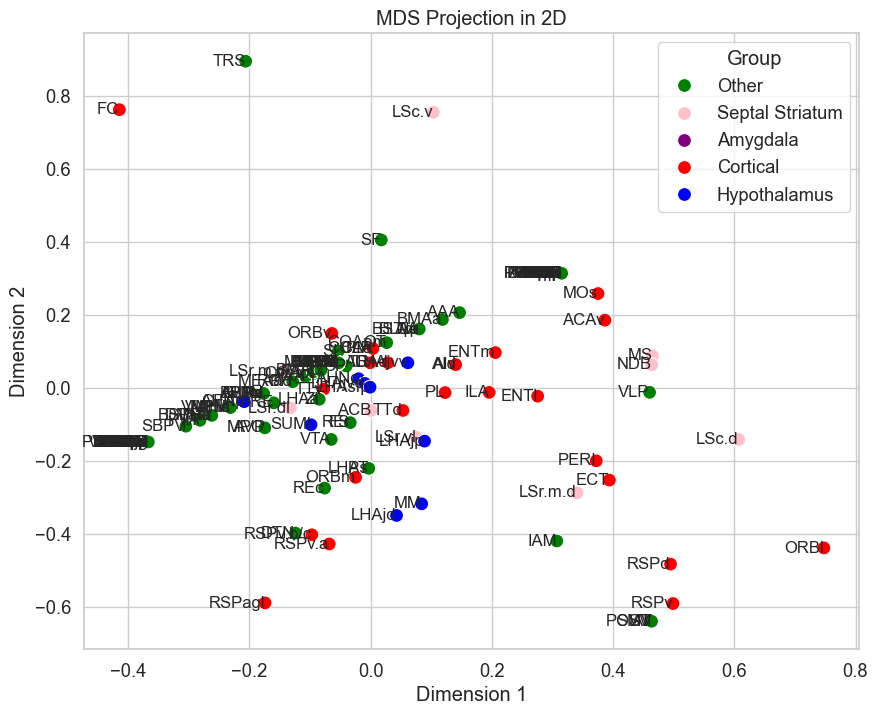

In [36]:
# do multidimensional scaling in 2D

dissimilarity_matrix = 1 - cosine_distance_df_from

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)


# Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', 
    data=mds_results, 
    hue='Group',  # Group coloring
    palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
    s=100, 
    marker='o'
)

# Annotate each point with its label
for label, (x, y, z) in mds_results.iterrows():
    plt.text(x, y, label, fontsize=12, ha='right', va='center')

# Add labels and title
plt.title("MDS Projection in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


plt.savefig("../output/MDS_2D_cosine_from.svg", format="svg")
# Show the plot
plt.show()

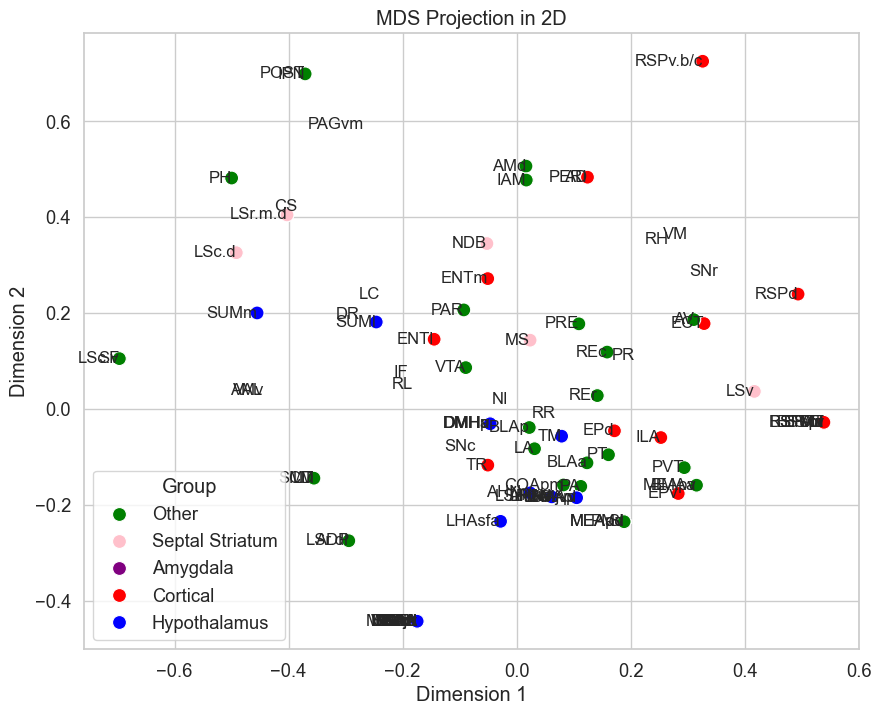

In [37]:
# do multidimensional scaling in 2D

dissimilarity_matrix = 1 - cosine_distance_df_to

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)


# Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', 
    data=mds_results, 
    hue='Group',  # Group coloring
    palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
    s=100, 
    marker='o'
)

# Annotate each point with its label
for label, (x, y, z) in mds_results.iterrows():
    plt.text(x, y, label, fontsize=12, ha='right', va='center')

# Add labels and title
plt.title("MDS Projection in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


plt.savefig("../output/MDS_2D_cosine_to.svg", format="svg")
# Show the plot
plt.show()

## t-SNE

<Figure size 800x600 with 0 Axes>

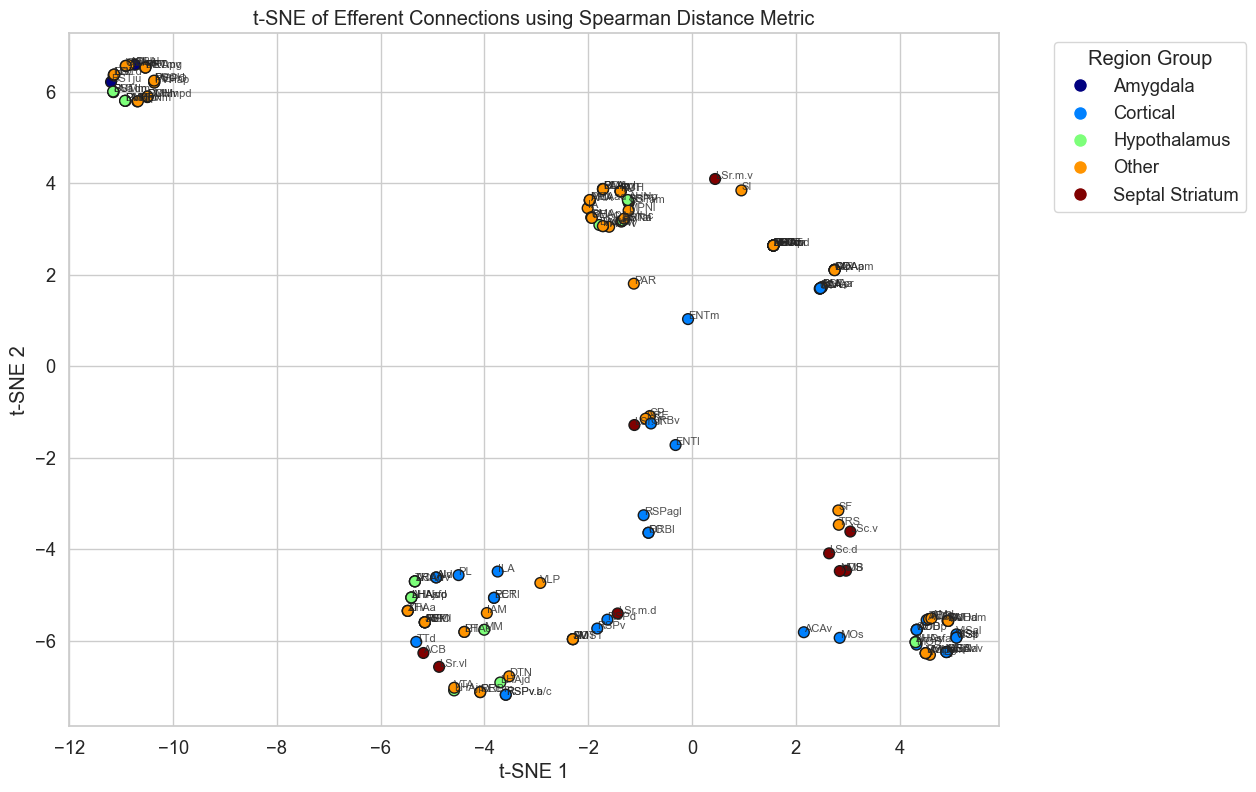

In [38]:
distance_matrix = 1 - spearman_df_from

labels = spearman_df_from.index
groups = [region_groups.get(region, "Other") for region in labels]


# Apply t-SNE on the distance matrix
tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=42)
embedding = tsne.fit_transform(distance_matrix)

# Plotting the result
plt.figure(figsize=(8, 6))

# Color based on group
le = LabelEncoder()
group_ids = le.fit_transform(groups)
unique_groups = le.classes_

# Plot
plt.figure(figsize=(12, 9))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=group_ids, cmap='jet', s=60, edgecolors='k')

for i, name in enumerate(labels):
    plt.annotate(name, (embedding[i, 0], embedding[i, 1]), fontsize=8, alpha=0.8)


# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=group,
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i, group in enumerate(unique_groups)]
plt.legend(handles=handles, title='Region Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE of Efferent Connections using Spearman Distance Metric')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)

plt.savefig("../output/tSNE_spearman_from.svg", format="svg")
plt.show()


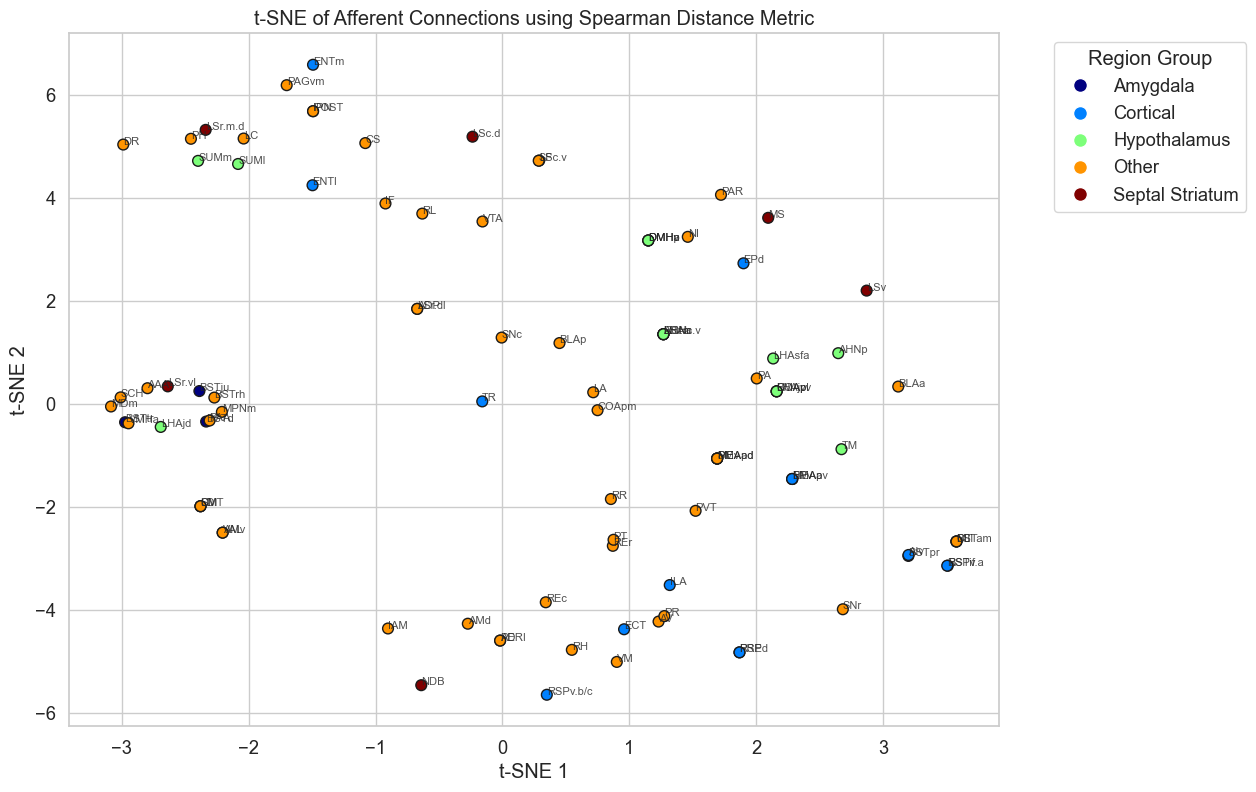

In [39]:
distance_matrix = 1 - spearman_df_to

labels = spearman_df_to.index
groups = [region_groups.get(region, "Other") for region in labels]

# Apply t-SNE on the distance matrix
tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=42)
embedding = tsne.fit_transform(distance_matrix)

# Color based on group
le = LabelEncoder()
group_ids = le.fit_transform(groups)
unique_groups = le.classes_

# Plot
plt.figure(figsize=(12, 9))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=group_ids, cmap='jet', s=60, edgecolors='k')

for i, name in enumerate(labels):
    plt.annotate(name, (embedding[i, 0], embedding[i, 1]), fontsize=8, alpha=0.8)

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=group,
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i, group in enumerate(unique_groups)]
plt.legend(handles=handles, title='Region Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE of Afferent Connections using Spearman Distance Metric')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.savefig("../output/tSNE_spearman_to.svg", format="svg")
plt.show()


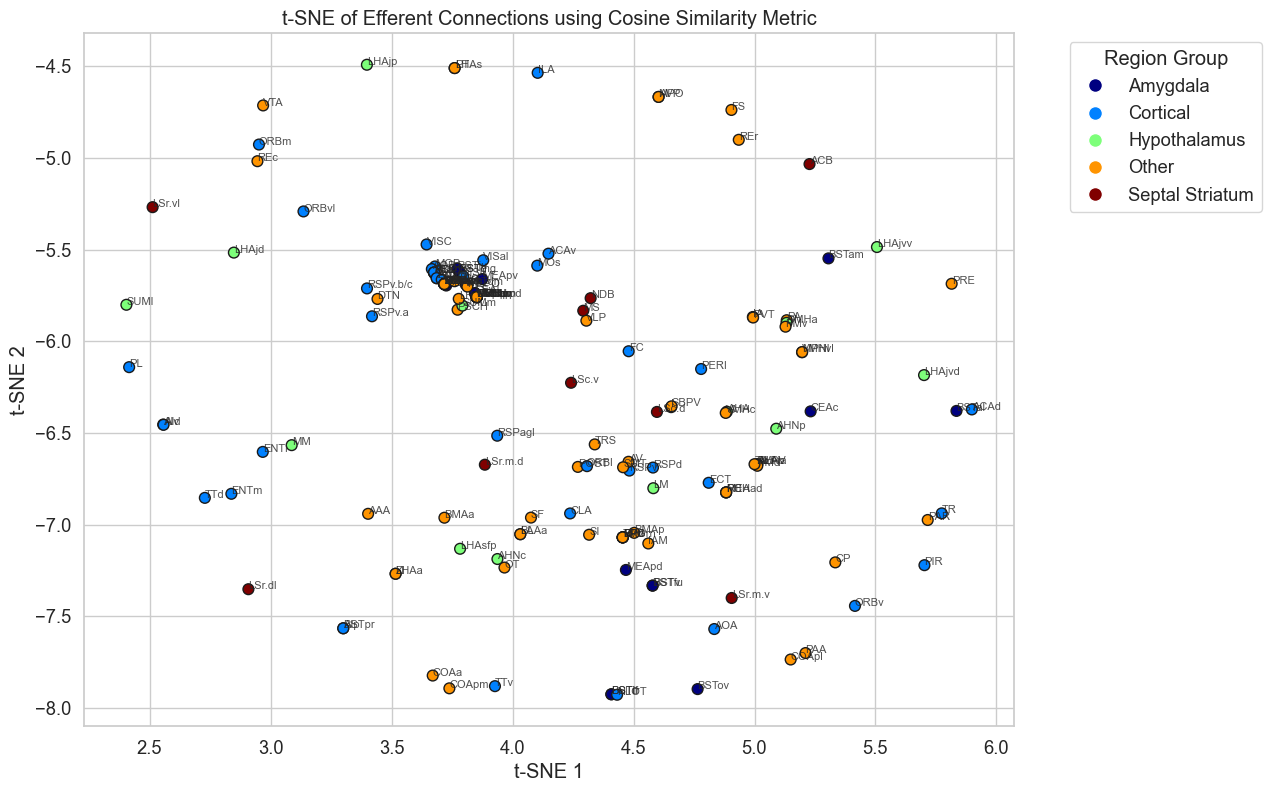

In [40]:
labels = cosine_distance_df_from.index
groups = [region_groups.get(region, "Other") for region in labels]

# Apply t-SNE on the distance matrix
tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=42)
embedding = tsne.fit_transform(cosine_distance_df_from)

# Color based on group
le = LabelEncoder()
group_ids = le.fit_transform(groups)
unique_groups = le.classes_

# Plot
plt.figure(figsize=(12, 9))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=group_ids, cmap='jet', s=60, edgecolors='k')

for i, name in enumerate(labels):
    plt.annotate(name, (embedding[i, 0], embedding[i, 1]), fontsize=8, alpha=0.8)

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=group,
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i, group in enumerate(unique_groups)]
plt.legend(handles=handles, title='Region Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE of Efferent Connections using Cosine Similarity Metric')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)

plt.savefig("../output/tSNE_cosine_from.svg", format="svg")
plt.show()

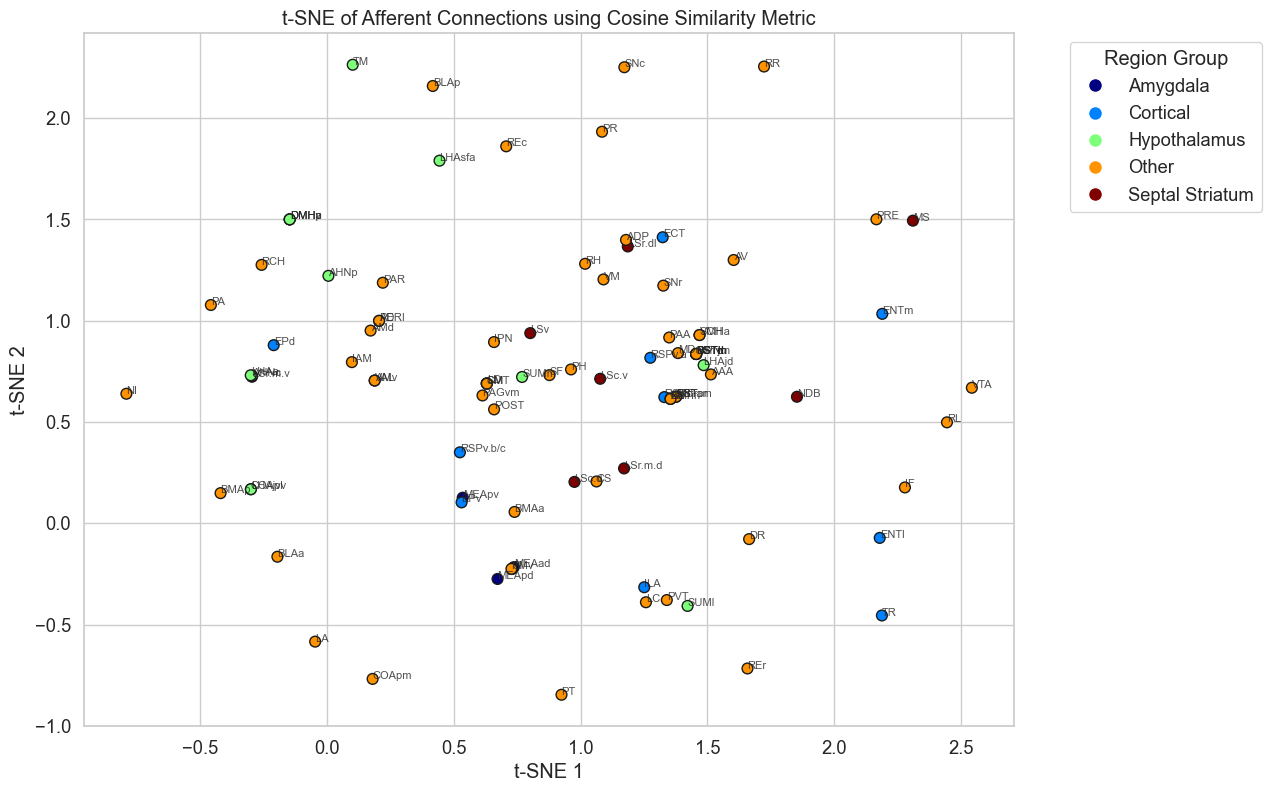

In [41]:
labels = cosine_distance_df_to.index
groups = [region_groups.get(region, "Other") for region in labels]

# Apply t-SNE on the distance matrix
tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=42)
embedding = tsne.fit_transform(cosine_distance_df_to)

# Color based on group
le = LabelEncoder()
group_ids = le.fit_transform(groups)
unique_groups = le.classes_

# Plot
plt.figure(figsize=(12, 9))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=group_ids, cmap='jet', s=60, edgecolors='k')

for i, name in enumerate(labels):
    plt.annotate(name, (embedding[i, 0], embedding[i, 1]), fontsize=8, alpha=0.8)

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=group,
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i, group in enumerate(unique_groups)]
plt.legend(handles=handles, title='Region Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE of Afferent Connections using Cosine Similarity Metric')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)

plt.savefig("../output/tSNE_cosine_to.svg", format="svg")
plt.show()

# Now calculate the euclidean distance between MDS points

In [42]:
coords = mds_results[['Dim1', 'Dim2']].values

## Repeat the process using basal ganglia regions

In [43]:
bg_regions = np.array(['GPl','GPm','STN','SNr','SNc','CP'])

# FROM basal ganglia
df_avg_from_bg = df_average[df_average.index.isin(bg_regions)]

# TO basal ganglia
df_average_t = df_average.T
df_avg_to_bg = df_average_t[df_average_t.index.isin(bg_regions)]

# drop basal ganglia columns
df_avg_from_bg = df_avg_from_bg.drop(bg_regions, axis=1)
df_avg_to_bg = df_avg_to_bg.drop(bg_regions, axis=1)

# filter to only include columns and rows with at least one connection
df_avg_from_bg = df_avg_from_bg.loc[:,df_avg_from_bg.apply(np.count_nonzero, axis=0) >= 1]
df_avg_to_bg = df_avg_to_bg.loc[:,df_avg_to_bg.apply(np.count_nonzero, axis=0) >= 1]

In [44]:
# probably want to drop na columns and rows of all NaNs
spearman_df_from_bg = (df_avg_from_bg.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')
spearman_df_to_bg = (df_avg_to_bg.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')

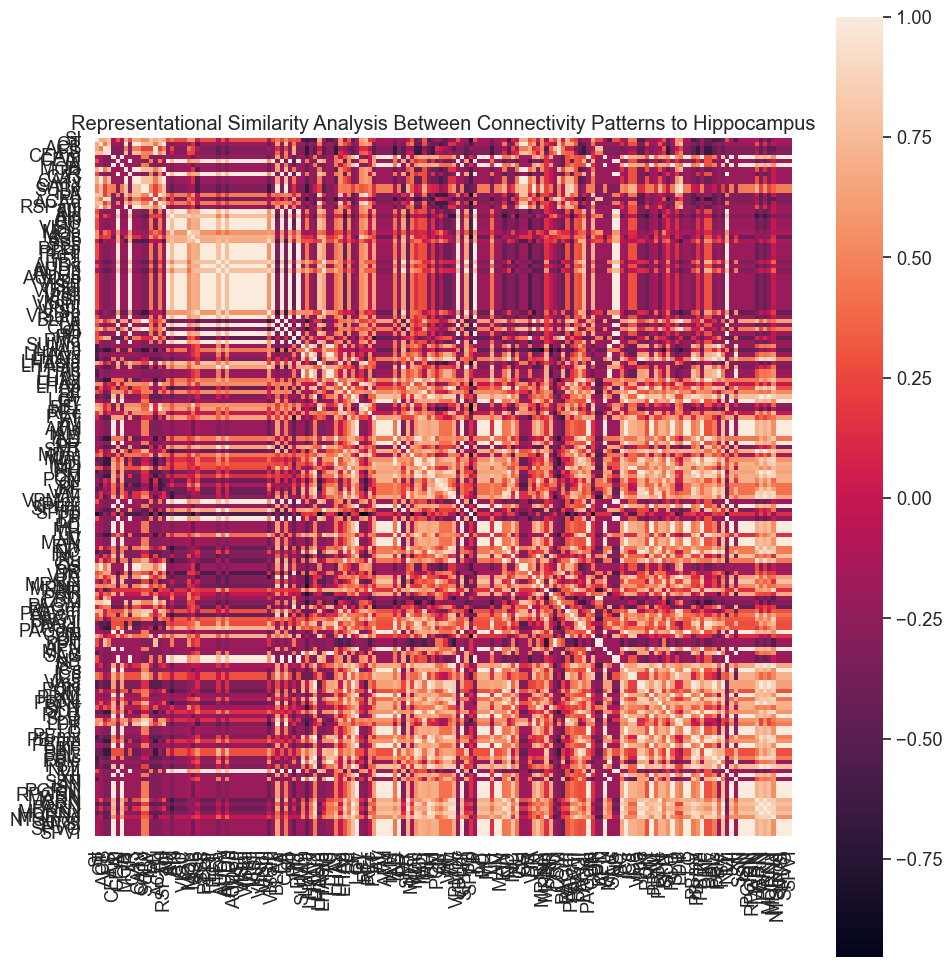

In [45]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(spearman_df_from_bg, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Show the plot
plt.show()

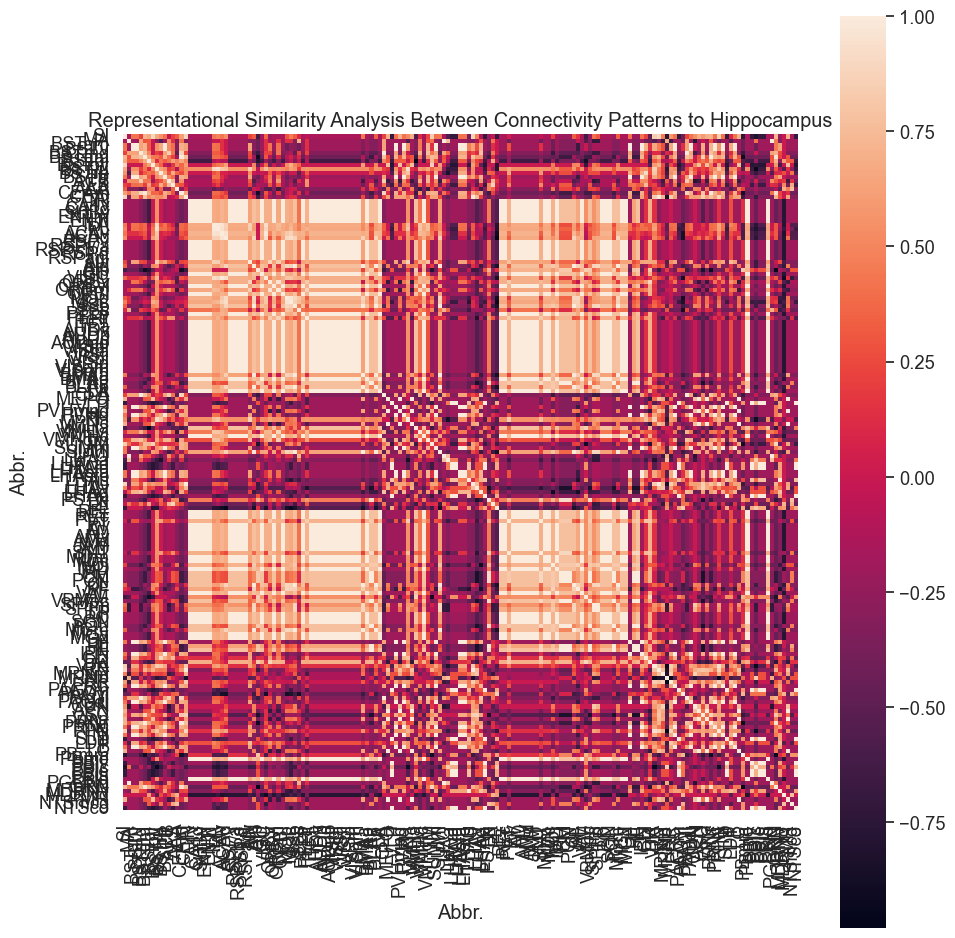

In [46]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(spearman_df_to_bg, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Show the plot
plt.show()

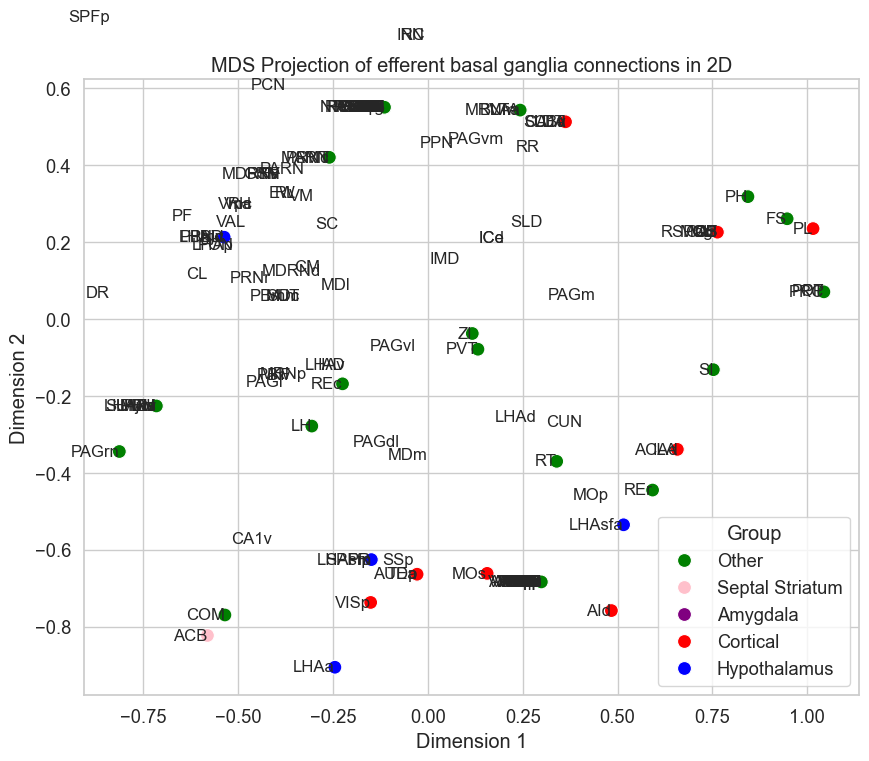

In [47]:
# Next, run MDS on the correlation matrices

# do multidimensional scaling in 2D
dissimilarity_matrix = 1 - spearman_df_from_bg

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)


# Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', 
    data=mds_results, 
    hue='Group',  # Group coloring
    palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
    s=100, 
    marker='o'
)

# Annotate each point with its label
for label, (x, y, z) in mds_results.iterrows():
    plt.text(x, y, label, fontsize=12, ha='right', va='center')

# Add labels and title
plt.title("MDS Projection of efferent basal ganglia connections in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


plt.savefig("../output/MDS_2D_spearman_from_bg.svg", format="svg")
# Show the plot
plt.show()

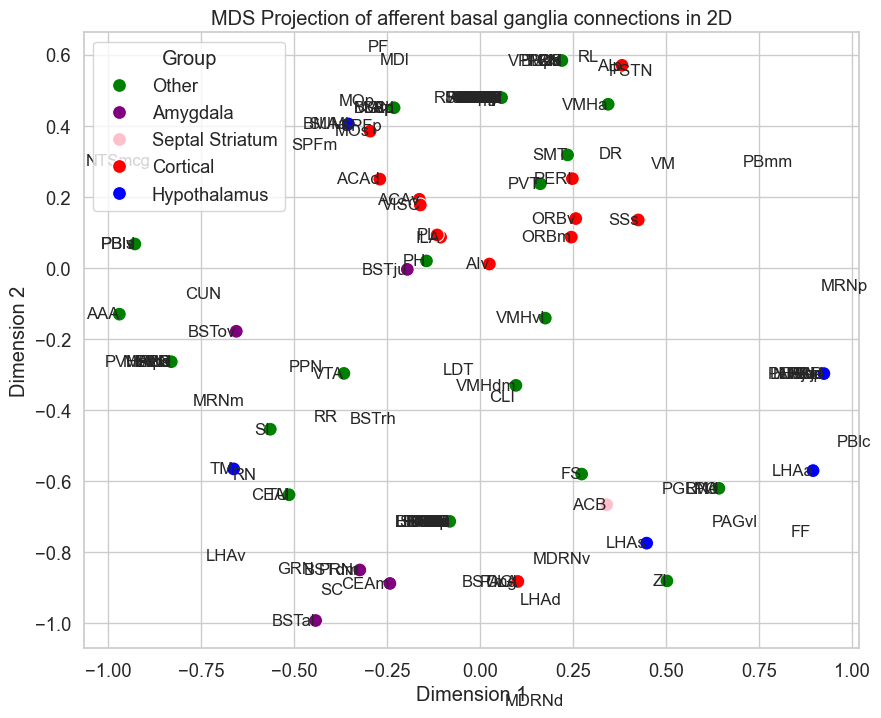

In [48]:
# Next, run MDS on the correlation matrices

# do multidimensional scaling in 2D
dissimilarity_matrix = 1 - spearman_df_to_bg

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)


# Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', 
    data=mds_results, 
    hue='Group',  # Group coloring
    palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
    s=100, 
    marker='o'
)

# Annotate each point with its label
for label, (x, y, z) in mds_results.iterrows():
    plt.text(x, y, label, fontsize=12, ha='right', va='center')

# Add labels and title
plt.title("MDS Projection of afferent basal ganglia connections in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


plt.savefig("../output/MDS_2D_spearman_to_bg.svg", format="svg")
# Show the plot
plt.show()

### Create 2x2 figures showing correlation matrices across hippocampus and basal ganglia

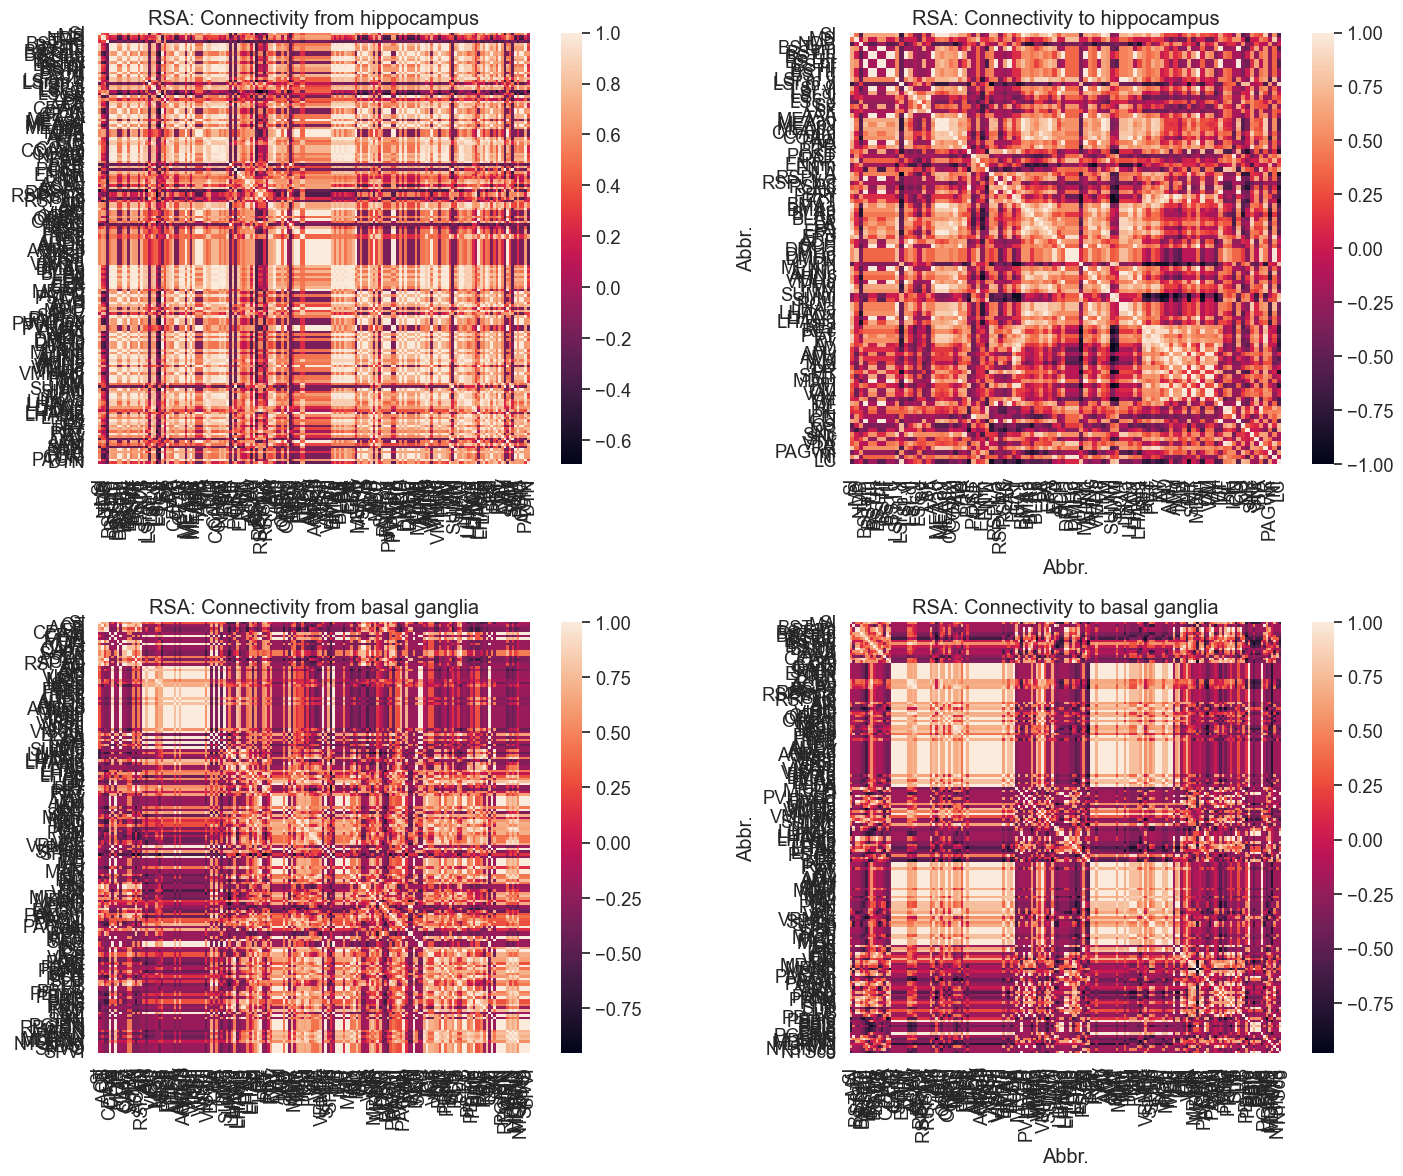

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataframes
dfs = [spearman_df_from, spearman_df_to, spearman_df_from_bg, spearman_df_to_bg]
titles = [
    "RSA: Connectivity from hippocampus",
    "RSA: Connectivity to hippocampus",
    "RSA: Connectivity from basal ganglia",
    "RSA: Connectivity to basal ganglia"
]

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.ravel()

# Loop through and create each heatmap
for i in range(4):
    sns.heatmap(dfs[i], ax=axs[i], fmt=".2f", cbar=True, square=True,
                xticklabels=True, yticklabels=True)
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()
fig.savefig('../output/rsa_comparison_hpc_bg.png', dpi=300, bbox_inches='tight')

In [51]:
def plot_mds(df, ax, title=""):
    # Next, run MDS on the correlation matrices
    # do multidimensional scaling in 2D
    dissimilarity_matrix = 1 - df
    
    # Perform MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    embedding = mds.fit_transform(dissimilarity_matrix)
    
    # Create a DataFrame for the results
    mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
    mds_results['Group'] = mds_results.index.map(region_groups)
    
    
    # Plot the results
    sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
    
    # Plot the results in 3D
    # plt.figure(figsize=(10, 8))
    sns.scatterplot(
        ax=ax,
        x='Dim1', y='Dim2', 
        data=mds_results, 
        hue='Group',  # Group coloring
        palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
        s=100, 
        marker='o'
    )
    
    # Annotate each point with its label
    for label, (x, y, z) in mds_results.iterrows():
        ax.text(x, y, label, fontsize=12, ha='right', va='center')
    
    # Add labels and title
    ax.set_title(title)

    ax.set_xlabel('Dim1')
    ax.set_ylabel('Dim2')

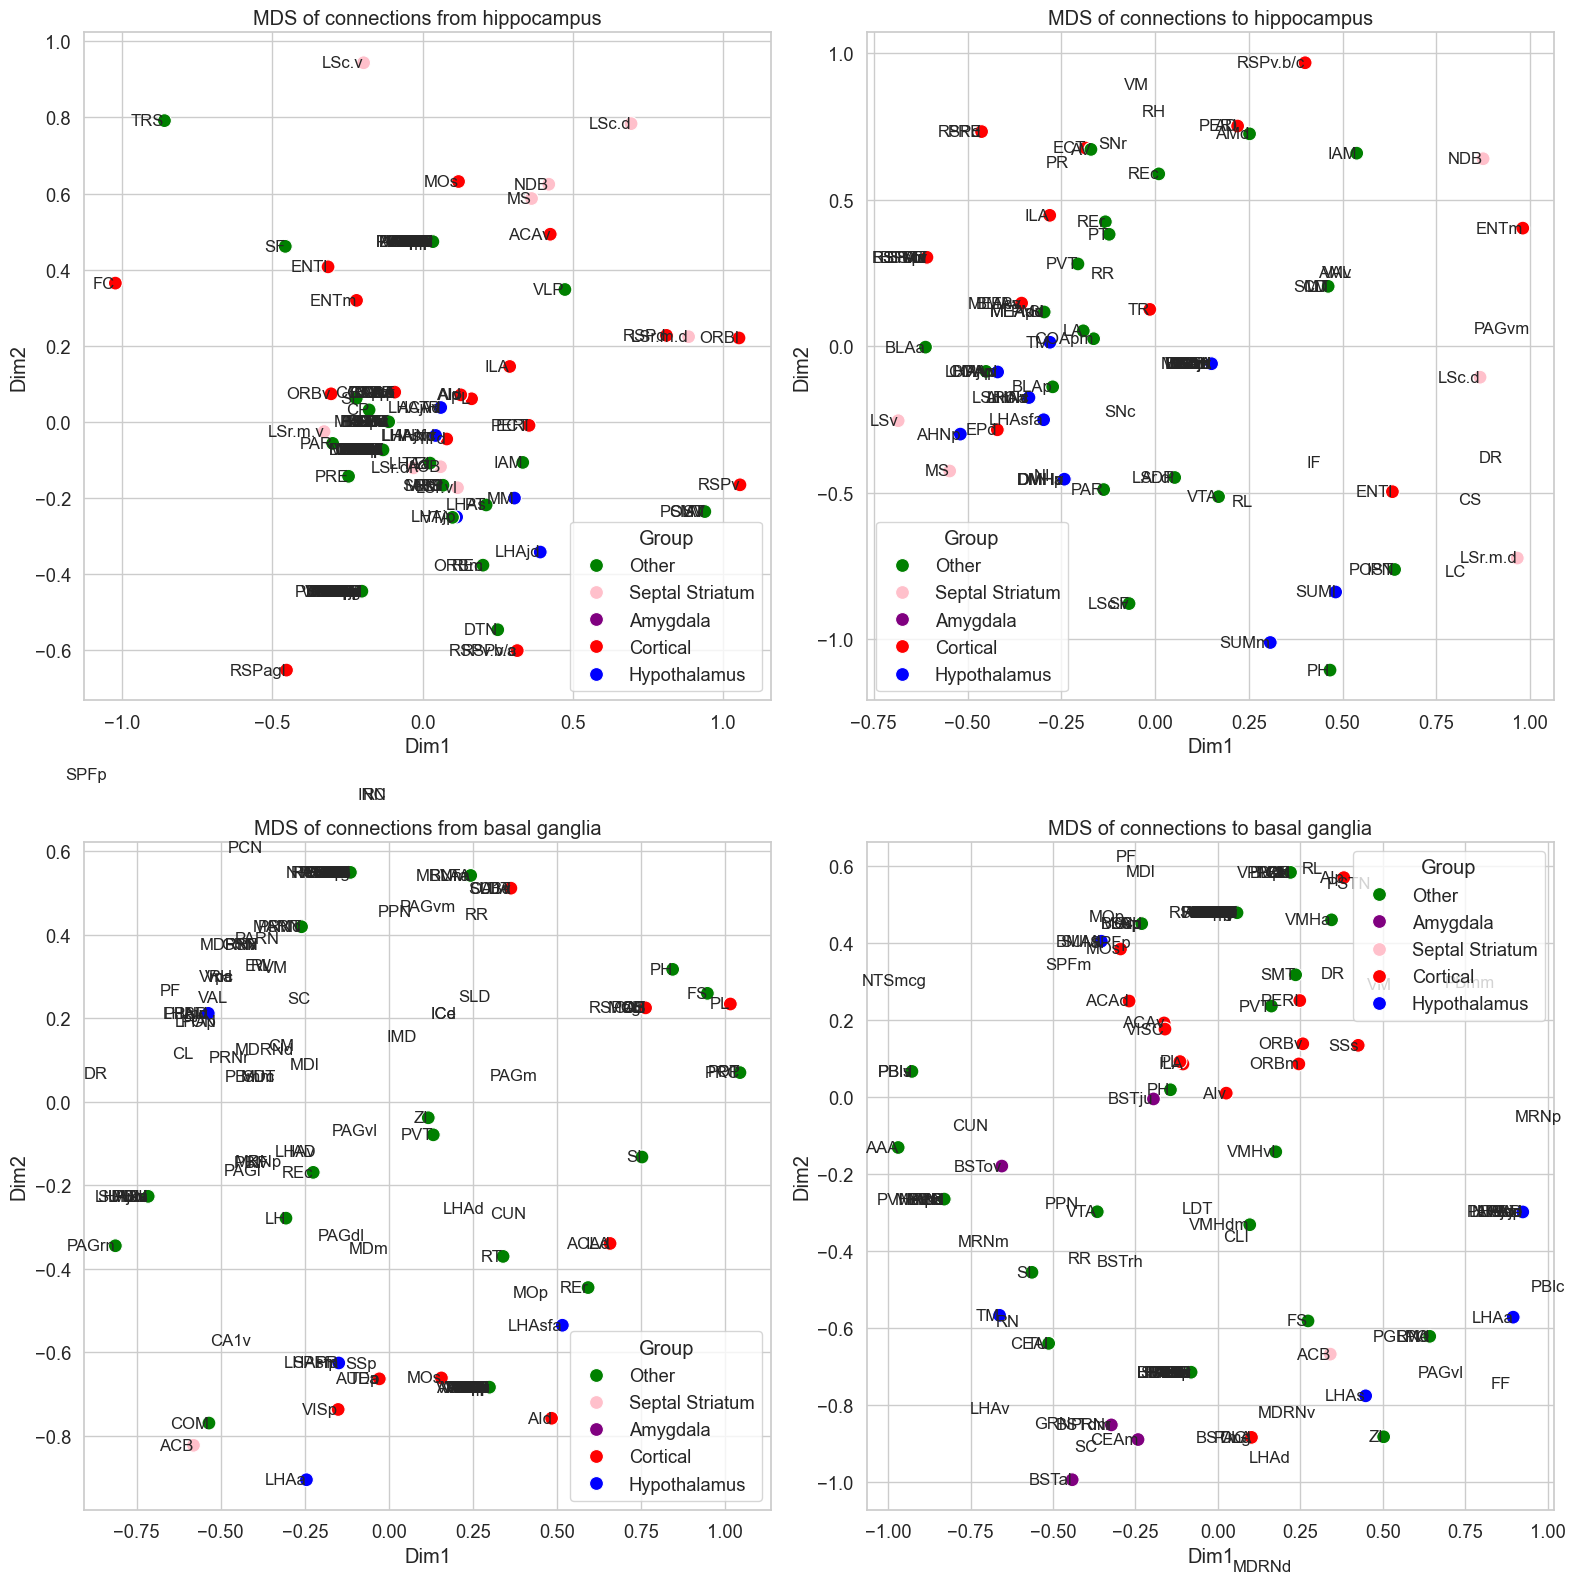

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs = axs.ravel()

dfs = [spearman_df_from, spearman_df_to, spearman_df_from_bg, spearman_df_to_bg]

plot_mds(df=spearman_df_from, ax=axs[0], title="MDS of connections from hippocampus")
plot_mds(df=spearman_df_to, ax=axs[1], title="MDS of connections to hippocampus")
plot_mds(df=spearman_df_from_bg, ax=axs[2], title="MDS of connections from basal ganglia")
plot_mds(df=spearman_df_to_bg, ax=axs[3], title="MDS of connections to basal ganglia")

plt.tight_layout()
plt.show()
# fig.savefig("my_heatmaps.png", dpi=300, bbox_inches='tight')
fig.savefig('../output/mds_comparison_hpc_bg.png', dpi=300, bbox_inches='tight')

### Compute correlations between the four rsa plots

In [53]:
dfs = [spearman_df_from, spearman_df_to, spearman_df_from_bg, spearman_df_to_bg]


In [54]:
common_indices_from = spearman_df_from.index.intersection(spearman_df_from_bg.index)
common_indices_to = spearman_df_to.index.intersection(spearman_df_to_bg.index)

# efferent
rsa_spearman_aligned_from_hpc = spearman_df_from.loc[common_indices_from, common_indices_from]
rsa_spearman_aligned_from_bg = spearman_df_from_bg.loc[common_indices_from, common_indices_from]

# afferent
rsa_spearman_aligned_to_hpc = spearman_df_to.loc[common_indices_to, common_indices_to]
rsa_spearman_aligned_to_bg = spearman_df_to_bg.loc[common_indices_to, common_indices_to]

In [55]:
len(common_indices_to)

55

In [56]:
common_indices_to

Index(['SI', 'BSTam', 'BSTju', 'BSTrh', 'BSTtr', 'AAA', 'TR', 'ENTm', 'ENTl',
       'ILA', 'RSPv.a', 'RSPv.b/c', 'RSPd', 'AIv', 'PERI', 'ECT', 'BMAa',
       'BMAp', 'BLAa', 'BLAp', 'LA', 'PH', 'VMHa', 'TM', 'SUMm', 'SUMl',
       'LHAa', 'LHAjd', 'LHAsfa', 'REr', 'REc', 'PVT', 'PT', 'AV', 'AD', 'AMv',
       'AMd', 'IAM', 'LD', 'SMT', 'MDm', 'RH', 'CM', 'VAL', 'VM', 'RL', 'IF',
       'IPN', 'CLI', 'DR', 'VTA', 'RR', 'PAGvm', 'NI', 'LC'],
      dtype='object', name='Abbr.')

In [57]:
# ensure that the common indices dont contian hpc or bg regions
if set(bg_regions) & set(common_indices_from):
    print('ope')
else:
    print('nope')

nope


### Efferent correlation between basal ganglia and hippocampus

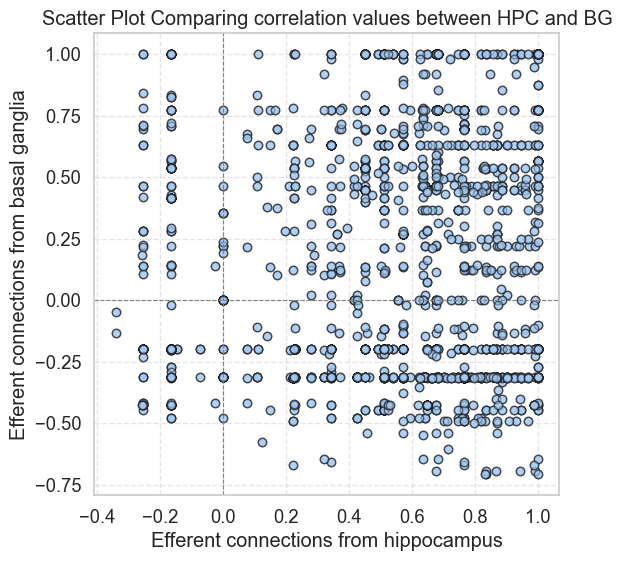

In [58]:
# Flatten matrices to get corresponding values
x_values = rsa_spearman_aligned_from_hpc.to_numpy().flatten()  
y_values = rsa_spearman_aligned_from_bg.to_numpy().flatten()

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, alpha=0.6, edgecolor="k")
plt.xlabel("Efferent connections from hippocampus")
plt.ylabel("Efferent connections from basal ganglia")
plt.title("Scatter Plot Comparing correlation values between HPC and BG")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.8)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [59]:
from scipy.stats import spearmanr, pearsonr

flat_from_hpc = rsa_spearman_aligned_from_hpc.to_numpy().flatten()
flat_from_bg = rsa_spearman_aligned_from_bg.to_numpy().flatten()

correlation_efferent, p_value = pearsonr(flat_from_hpc, flat_from_bg)

print(correlation_efferent, p_value)

0.18464918527207536 6.797964080385461e-30


### Afferent correlations between hippocampus and basal ganglia

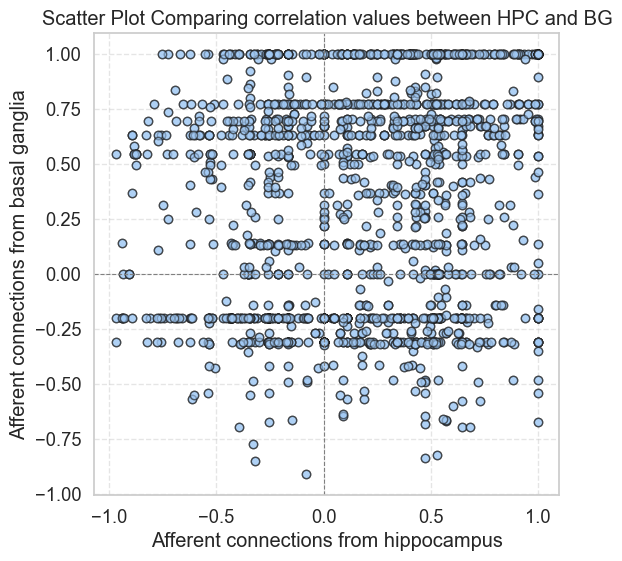

In [60]:
# Flatten matrices to get corresponding values
x_values = rsa_spearman_aligned_to_hpc.to_numpy().flatten()  
y_values = rsa_spearman_aligned_to_bg.to_numpy().flatten()

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, alpha=0.6, edgecolor="k")
plt.xlabel("Afferent connections from hippocampus")
plt.ylabel("Afferent connections from basal ganglia")
plt.title("Scatter Plot Comparing correlation values between HPC and BG")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.8)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [61]:
from scipy.stats import spearmanr, pearsonr

flat_to_hpc = rsa_spearman_aligned_to_hpc.to_numpy().flatten()
flat_to_bg = rsa_spearman_aligned_to_bg.to_numpy().flatten()

correlation_afferent, p_value = pearsonr(flat_to_hpc, flat_to_bg)

print(correlation_afferent, p_value)

0.13988959088833117 1.0858380551246434e-14


Correlations between afferent and efferent for a given ROI

Bootstrap running 1000 simulations shuffling the roi vectors


### Bootstrapping - first calculate correlations

In [62]:
num_sims = 1000

correlation_afferent_arr = np.zeros(num_sims, dtype=float)
correlation_efferent_arr = np.zeros(num_sims, dtype=float)

for i in range(1000):
    # Subsample size
    k = 7
    
    # Random subsample without replacement
    subsample = np.random.choice(df_average.index, size=k, replace=False)

    # construct afferent / efferent connection matrices from random regions
    # FROM random
    df_avg_from_random_sample = df_average[df_average.index.isin(subsample)]
    
    # TO random
    df_average_t = df_average.T
    df_avg_to_random_sample = df_average_t[df_average_t.index.isin(subsample)]
    
    # probably want to drop na columns and rows of all NaNs
    spearman_df_from_random_sample = (df_avg_from_random_sample.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')
    spearman_df_to_random_sample = (df_avg_to_random_sample.corr(method='spearman').dropna(axis=0, how='all')).dropna(axis=1, how='all')
    
    common_indices_from = spearman_df_from.index.intersection(spearman_df_from_random_sample.index)
    common_indices_to = spearman_df_to.index.intersection(spearman_df_to_random_sample.index)
    
    # efferent
    rsa_spearman_aligned_from_hpc = spearman_df_from.loc[common_indices_from, common_indices_from]
    rsa_spearman_aligned_from_random_sample = spearman_df_from_random_sample.loc[common_indices_from, common_indices_from]
    
    # afferent
    rsa_spearman_aligned_to_hpc = spearman_df_to.loc[common_indices_to, common_indices_to]
    rsa_spearman_aligned_to_random_sample = spearman_df_to_random_sample.loc[common_indices_to, common_indices_to]

    flat_from_hpc = rsa_spearman_aligned_from_hpc.to_numpy().flatten()
    flat_from_random_sample = rsa_spearman_aligned_from_random_sample.to_numpy().flatten()
    
    flat_to_hpc = rsa_spearman_aligned_to_hpc.to_numpy().flatten()
    flat_to_random_sample = rsa_spearman_aligned_to_random_sample.to_numpy().flatten()

    # get correlation values
    correlation_afferent, p_aff = pearsonr(flat_to_hpc, flat_to_random_sample)
    correlation_efferent, p_eff = pearsonr(flat_from_hpc, flat_from_random_sample)

    correlation_afferent_arr[i] = correlation_afferent
    correlation_efferent_arr[i] = correlation_efferent
    

In [63]:
mean_corr_eff = np.mean(correlation_efferent_arr)
mean_corr_aff = np.mean(correlation_afferent_arr)

In [64]:
mean_corr_eff

0.18757973763136204

In [65]:
mean_corr_aff

0.2244417992089287

In [66]:
np.min(correlation_efferent_arr)

-0.10189558974332832

In [67]:
np.max(correlation_efferent_arr)

0.6315988687202875

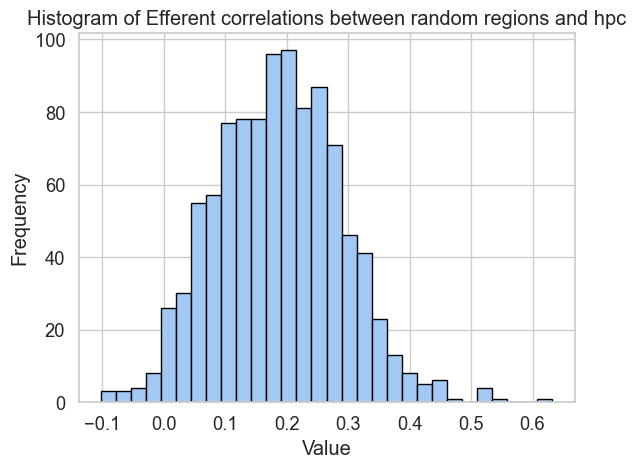

In [68]:
# Plot histogram
plt.hist(correlation_efferent_arr, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Efferent correlations between random regions and hpc')
plt.show()

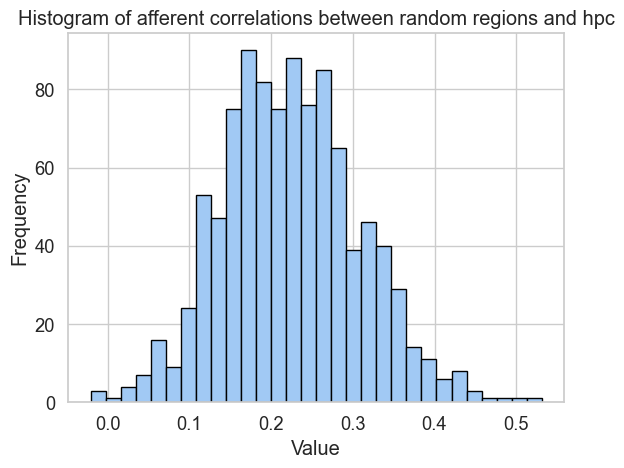

In [69]:
# Plot histogram
plt.hist(correlation_afferent_arr, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of afferent correlations between random regions and hpc')
plt.show()

## Bootstrapping 

#### Calculate average correlation matrix across 1000 iterations of random connections with those regions

In [70]:
hpc_efferent_regions = spearman_df_from.index

In [71]:
mask = np.isin(df_average.index, hippocampal_regions, invert=True)
non_hippocampal_regions = df_average.index[mask]

connectivity_matrix = df_average
target_cols = spearman_df_from.index

# Randomly sample 7 non-hippocampal regions
sampled_rows = np.random.choice(non_hippocampal_regions, size=7, replace=False)

# Extract the 7x162 matrix
sampled_matrix = connectivity_matrix.loc[sampled_rows, target_cols]

valid_columns = np.any(sampled_matrix != 0, axis=0)
valid_columns

SI        True
MS       False
NDB       True
TRS      False
BSTam     True
         ...  
VTA       True
PRC       True
COM       True
PAGrn     True
DTN      False
Length: 165, dtype: bool

In [72]:
sampled_matrix

SI   MS  NDB  TRS  BSTam  BSTfu  BSTv  BSTmg  BSTdm  BSTal  ...   AV  \
Abbr.                                                               ...        
GRN    1.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
PBlc   3.0  0.0  2.0  0.0    4.0    2.0   2.0    2.0    2.0    2.0  ...  0.0   
PON    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
RPA    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
CUN    3.0  0.0  0.0  0.0    2.0    0.0   2.0    0.0    0.0    1.0  ...  1.0   
AHNd   0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   
PVHpm  0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0    0.0  ...  0.0   

       AMd  IAM  SMT   LH  VTA  PRC  COM  PAGrn  DTN  
Abbr.                                                 
GRN    0.0  0.0  0.0  0.0  2.0  1.0  1.0    3.0  0.0  
PBlc   0.0  0.0  0.0  0.0  3.0  0.0  0.0    0.0  0.0  
PON    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
RPA    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
CUN    0.0  2.0  3.0  2.0  3.0  4.0  0.0    3.0  0.0  
AHNd   0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
PVHpm  0.0  0.0  0.0  0.0  2.0  0.0  0.0    0.0  0.0  

[7 rows x 165 columns]

In [73]:
# Compute correlation
corr_matrix = sampled_matrix.corr(method='spearman')

In [74]:
corr_matrix

SI  MS       NDB  TRS     BSTam     BSTfu      BSTv     BSTmg  \
SI     1.000000 NaN  0.569275  NaN  0.869582  0.569275  0.881917  0.569275   
MS          NaN NaN       NaN  NaN       NaN       NaN       NaN       NaN   
NDB    0.569275 NaN  1.000000  NaN  0.763763  1.000000  0.645497  1.000000   
TRS         NaN NaN       NaN  NaN       NaN       NaN       NaN       NaN   
BSTam  0.869582 NaN  0.763763  NaN  1.000000  0.763763  0.986013  0.763763   
...         ...  ..       ...  ...       ...       ...       ...       ...   
VTA    0.895979 NaN  0.540062  NaN  0.824958  0.540062  0.836660  0.540062   
PRC    0.645975 NaN -0.254588  NaN  0.277778 -0.254588  0.394405 -0.254588   
COM    0.227710 NaN -0.166667  NaN -0.254588 -0.166667 -0.258199 -0.166667   
PAGrn  0.617342 NaN -0.258199  NaN  0.197203 -0.258199  0.300000 -0.258199   
DTN         NaN NaN       NaN  NaN       NaN       NaN       NaN       NaN   

          BSTdm     BSTal  ...        AV  AMd       IAM       SMT        LH  \
SI     0.569275  0.869582  ...  0.569275  NaN  0.569275  0.569275  0.569275   
MS          NaN       NaN  ...       NaN  NaN       NaN       NaN       NaN   
NDB    1.000000  0.763763  ... -0.166667  NaN -0.166667 -0.166667 -0.166667   
TRS         NaN       NaN  ...       NaN  NaN       NaN       NaN       NaN   
BSTam  0.763763  1.000000  ...  0.509175  NaN  0.509175  0.509175  0.509175   
...         ...       ...  ...       ...  ...       ...       ...       ...   
VTA    0.540062  0.824958  ...  0.540062  NaN  0.540062  0.540062  0.540062   
PRC   -0.254588  0.277778  ...  0.763763  NaN  0.763763  0.763763  0.763763   
COM   -0.166667 -0.254588  ... -0.166667  NaN -0.166667 -0.166667 -0.166667   
PAGrn -0.258199  0.197203  ...  0.645497  NaN  0.645497  0.645497  0.645497   
DTN         NaN       NaN  ...       NaN  NaN       NaN       NaN       NaN   

            VTA       PRC       COM     PAGrn  DTN  
SI     0.895979  0.645975  0.227710  0.617342  NaN  
MS          NaN       NaN       NaN       NaN  NaN  
NDB    0.540062 -0.254588 -0.166667 -0.258199  NaN  
TRS         NaN       NaN       NaN       NaN  NaN  
BSTam  0.824958  0.277778 -0.254588  0.197203  NaN  
...         ...       ...       ...       ...  ...  
VTA    1.000000  0.542115  0.108012  0.501996  NaN  
PRC    0.542115  1.000000  0.509175  0.986013  NaN  
COM    0.108012  0.509175  1.000000  0.645497  NaN  
PAGrn  0.501996  0.986013  0.645497  1.000000  NaN  
DTN         NaN       NaN       NaN       NaN  NaN  

[165 rows x 165 columns]

In [75]:
n_targets = 162
full_corr = pd.DataFrame(0.0, index=target_cols, columns=target_cols)
full_mask = pd.DataFrame(0, index=target_cols, columns=target_cols)

for row_index, region_row in enumerate(target_cols):
    for col_index, region_col in enumerate(target_cols):
        if(not pd.isna(corr_matrix.loc[region_row,region_col])):
            full_corr.loc[region_row, region_col] = corr_matrix.loc[region_row,region_col]
            full_mask.loc[region_row, region_col] = 1

In [85]:
# Assuming your inputs are:
# connectivity_matrix: numpy array of shape (392, 392)
# hippocampal_indices: list or array of 7 indices for hippocampal regions
# target_cols: list or array of 162 indices of the target regions (columns)

def bootstrap_correlations(connectivity_matrix, hippocampal_indices, target_cols, n_iterations=1000):
    # this should be set to connectivity_matrix shape[0]
    n_regions = df_average.shape[0]
    n_targets = len(target_cols)

    sum_matrix = pd.DataFrame(0.0, index=target_cols, columns=target_cols)
    count_matrix = pd.DataFrame(0, index=target_cols, columns=target_cols)
    
    mask = np.isin(connectivity_matrix.index, hippocampal_regions, invert=True)
    non_hippocampal_regions = connectivity_matrix.index[mask]

    for i in range(n_iterations):
        # Randomly sample 7 non-hippocampal regions
        sampled_rows = np.random.choice(non_hippocampal_regions, size=7, replace=False)

        # Extract the 7x162 matrix
        sampled_matrix = connectivity_matrix.loc[sampled_rows, target_cols]

        # compute correlation
        corr_matrix = sampled_matrix.corr(method='spearman')

        # fill out the correlation matrix for current iteration
        # fill out mask matrix for current iteration
        full_corr = pd.DataFrame(0.0, index=target_cols, columns=target_cols)
        full_mask = pd.DataFrame(0, index=target_cols, columns=target_cols)
        
        for row_index, region_row in enumerate(target_cols):
            for col_index, region_col in enumerate(target_cols):
                if(not pd.isna(corr_matrix.loc[region_row,region_col])):
                    full_corr.loc[region_row, region_col] = corr_matrix.loc[region_row,region_col]
                    full_mask.loc[region_row, region_col] = 1


        # Update accumulators
        sum_matrix = sum_matrix + full_corr
        count_matrix = count_matrix + full_mask

    average_matrix = sum_matrix / count_matrix
    return average_matrix, count_matrix
    
    # Avoid division by zero
    # with np.errstate(invalid='ignore', divide='ignore'):
    #     average_matrix = sum_matrix / count_matrix
    #     average_matrix[np.isnan(average_matrix)] = np.nan

In [79]:
avg_corr_matrix_efferent, counts_efferent = bootstrap_correlations(connectivity_matrix = df_average, 
                                                 hippocampal_indices=hippocampal_regions, 
                                                 target_cols=spearman_df_from.index,
                                                 n_iterations=1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [80]:
avg_corr_matrix_efferent

SI        MS       NDB       TRS     BSTam     BSTfu      BSTv  \
SI     1.000000  0.518285  0.555621  0.403642  0.645935  0.571537  0.622681   
MS     0.518285  1.000000  0.713006  0.626248  0.531775  0.311612  0.518272   
NDB    0.555621  0.713006  1.000000  0.654889  0.507468  0.376813  0.504252   
TRS    0.403642  0.626248  0.654889  1.000000  0.397006  0.136644  0.468271   
BSTam  0.645935  0.531775  0.507468  0.397006  1.000000  0.609946  0.827091   
...         ...       ...       ...       ...       ...       ...       ...   
VTA    0.593763  0.419057  0.514048  0.372363  0.398827  0.424460  0.428148   
PRC    0.492456  0.498768  0.461519  0.430101  0.468632  0.355081  0.508811   
COM    0.509051  0.458592  0.417490  0.285896  0.528970  0.401918  0.551224   
PAGrn  0.514300  0.579134  0.542371  0.493304  0.542465  0.389717  0.605177   
DTN    0.146428  0.192233  0.263558  0.092346  0.029450  0.170652 -0.046245   

          BSTmg     BSTdm     BSTal  ...        AV       AMd       IAM  \
SI     0.607752  0.621838  0.716534  ...  0.121550  0.232267  0.377412   
MS     0.466789  0.518436  0.524923  ...  0.286916  0.405248  0.540744   
NDB    0.437903  0.464893  0.513762  ...  0.304603  0.338712  0.469519   
TRS    0.344605  0.411745  0.376828  ...  0.421687  0.524854  0.448107   
BSTam  0.858426  0.893854  0.879368  ...  0.073379  0.229771  0.375150   
...         ...       ...       ...  ...       ...       ...       ...   
VTA    0.396975  0.383502  0.444562  ...  0.281555  0.305607  0.414285   
PRC    0.468061  0.494476  0.466295  ...  0.287134  0.414960  0.540278   
COM    0.527572  0.521285  0.527709  ...  0.169973  0.349699  0.480400   
PAGrn  0.554795  0.559690  0.572472  ...  0.322406  0.450037  0.583035   
DTN   -0.018720  0.001033  0.094280  ...  0.301007  0.153307  0.215562   

            SMT        LH       VTA       PRC       COM     PAGrn       DTN  
SI     0.199184  0.473448  0.593763  0.492456  0.509051  0.514300  0.146428  
MS     0.162779  0.599397  0.419057  0.498768  0.458592  0.579134  0.192233  
NDB    0.285192  0.587406  0.514048  0.461519  0.417490  0.542371  0.263558  
TRS    0.256291  0.575032  0.372363  0.430101  0.285896  0.493304  0.092346  
BSTam  0.021124  0.449916  0.398827  0.468632  0.528970  0.542465  0.029450  
...         ...       ...       ...       ...       ...       ...       ...  
VTA    0.348495  0.526422  1.000000  0.566599  0.492061  0.543220  0.252856  
PRC    0.195384  0.535314  0.566599  1.000000  0.534676  0.660887  0.103499  
COM    0.149057  0.440554  0.492061  0.534676  1.000000  0.729381  0.169686  
PAGrn  0.286996  0.574253  0.543220  0.660887  0.729381  1.000000  0.217067  
DTN    0.302784  0.193074  0.252856  0.103499  0.169686  0.217067  1.000000  

[165 rows x 165 columns]

In [81]:
counts_efferent

SI   MS  NDB  TRS  BSTam  BSTfu  BSTv  BSTmg  BSTdm  BSTal  ...   AV  \
SI     989  740  892  447    894    729   822    793    820    893  ...  647   
MS     740  742  712  414    699    563   656    629    644    700  ...  512   
NDB    892  712  896  444    827    664   763    732    755    822  ...  606   
TRS    447  414  444  448    431    333   418    392    404    422  ...  337   
BSTam  894  699  827  431    896    698   807    791    818    867  ...  593   
...    ...  ...  ...  ...    ...    ...   ...    ...    ...    ...  ...  ...   
VTA    982  738  893  446    891    726   819    790    816    888  ...  649   
PRC    911  701  841  435    849    695   784    756    783    843  ...  611   
COM    781  627  725  380    740    603   688    669    688    735  ...  532   
PAGrn  919  715  849  435    853    688   792    761    787    851  ...  620   
DTN    527  407  489  247    476    403   430    414    435    473  ...  377   

       AMd  IAM  SMT   LH  VTA  PRC  COM  PAGrn  DTN  
SI     586  734  823  860  982  911  781    919  527  
MS     488  614  622  690  738  701  627    715  407  
NDB    552  689  753  799  893  841  725    849  489  
TRS    328  388  390  434  446  435  380    435  247  
BSTam  544  686  750  797  891  849  740    853  476  
...    ...  ...  ...  ...  ...  ...  ...    ...  ...  
VTA    590  738  825  859  992  911  782    922  528  
PRC    565  714  759  821  911  914  750    880  488  
COM    495  621  655  712  782  750  783    776  426  
PAGrn  569  715  772  825  922  880  776    927  500  
DTN    328  407  461  466  528  488  426    500  531  

[165 rows x 165 columns]

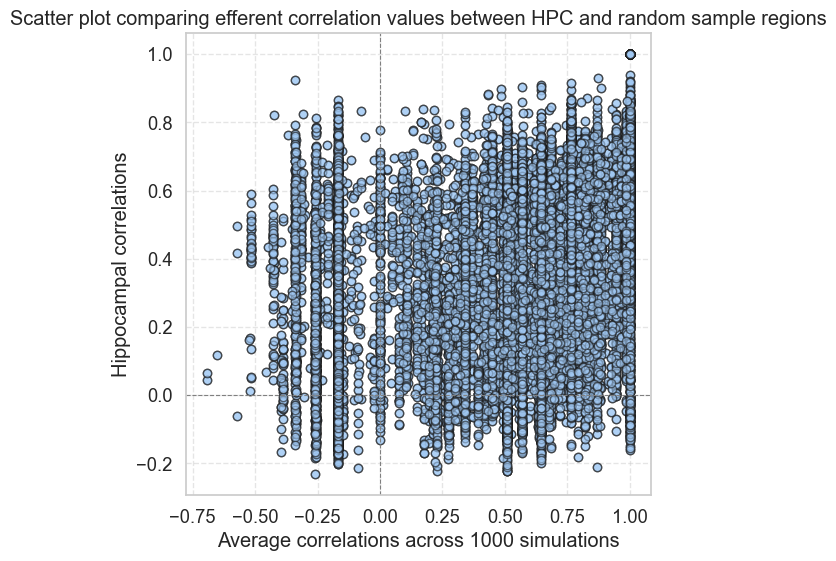

In [83]:
# Flatten matrices to get corresponding values
x_values = spearman_df_from.to_numpy().flatten()  
y_values = avg_corr_matrix_efferent.to_numpy().flatten()

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, alpha=0.6, edgecolor="k")
plt.xlabel("Average correlations across 1000 simulations")
plt.ylabel("Hippocampal correlations")
plt.title("Scatter plot comparing efferent correlation values between HPC and random sample regions")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.8)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

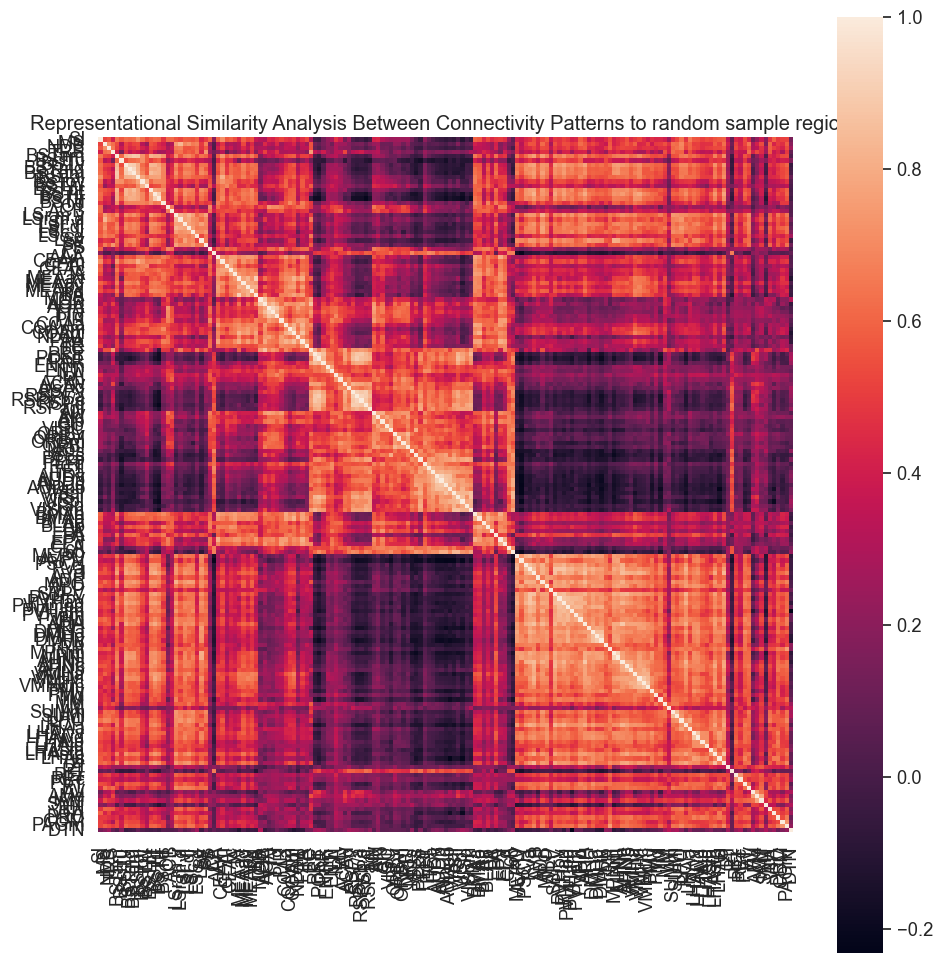

In [84]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(avg_corr_matrix_efferent, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to random sample regions")
plt.tight_layout()

# Show the plot
plt.show()

In [86]:
# calculate correlation between null and hpc corr matrices -- efferent
flat_spearman_efferent = spearman_df_from.values.flatten()
flat_avg_corr_rs = avg_corr_matrix_efferent.values.flatten()

correlation_efferent, p_value = pearsonr(flat_spearman_efferent, flat_avg_corr_rs)

In [87]:
correlation_efferent

0.3000085165522836

In [88]:
avg_corr_matrix_afferent, counts_afferent = bootstrap_correlations(connectivity_matrix = df_average, 
                                                 hippocampal_indices=hippocampal_regions, 
                                                 target_cols=spearman_df_to.index,
                                                 n_iterations=1000)

In [90]:
# calculate correlation between null and hpc corr matricies -- afferent
flat_spearman_afferent = spearman_df_to.values.flatten()
flat_avg_corr_rs_aff = avg_corr_matrix_afferent.values.flatten()

correlation_afferent, p_value_aff = pearsonr(flat_spearman_afferent, flat_avg_corr_rs_aff)

In [91]:
correlation_afferent

0.29281481174496377

In [92]:
p_value_aff

1.258003769977589e-181

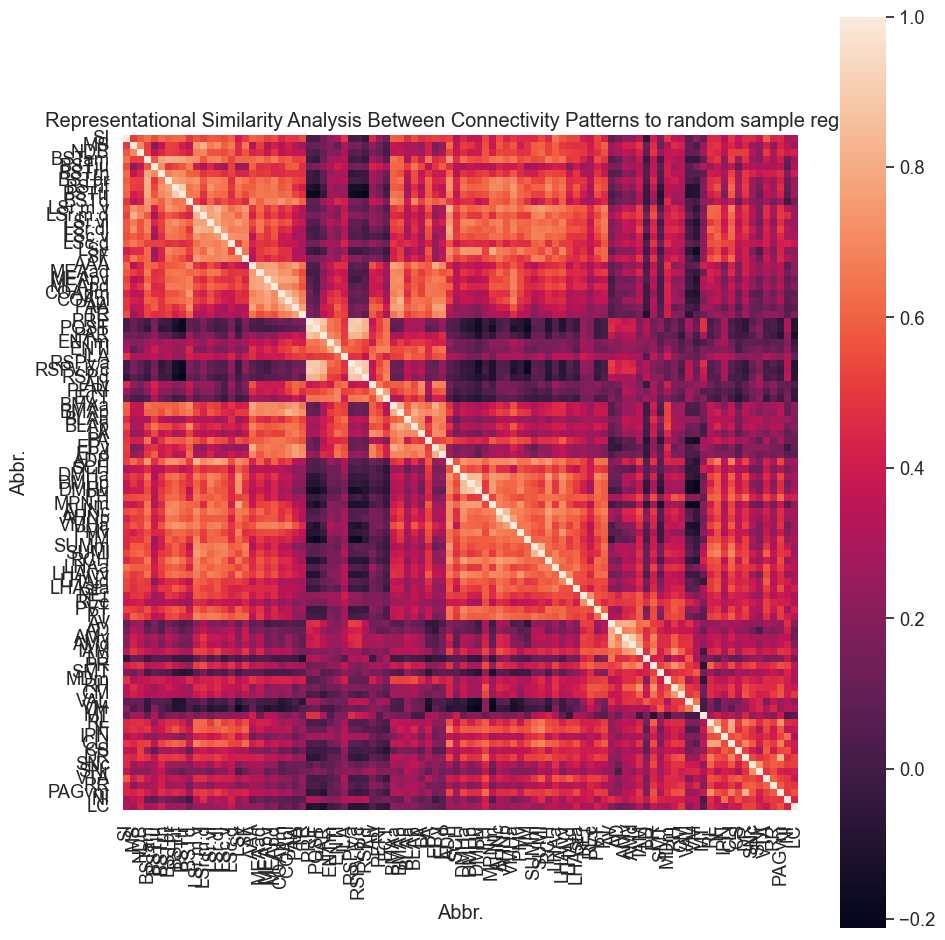

In [93]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(10, 10))
sns.heatmap(avg_corr_matrix_afferent, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to random sample regions")
plt.tight_layout()

# Show the plot
plt.show()